In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 99999

def load_data_daily(filename):
    """
    Funzione per il caricamento di uno storico daily
    Fonte dati: Tradestation .txt
    """
    data = pd.read_csv(filename, parse_dates = ["Date","Time"])
    data.columns = ["date","time","open","high","low","close","volume","oi"]
    data.set_index("date", inplace = True)
    data.drop(["time","oi"], axis=1, inplace=True)
    data["dayofweek"] = data.index.dayofweek
    data["day"] = data.index.day
    data["month"] = data.index.month
    data["year"] = data.index.year
    data["dayofyear"] = data.index.dayofyear
    data["quarter"] = data.index.quarter
    return data

dataset = load_data_daily("AAPL_Daily.txt")
dataset.tail(10)

,open,high,low,close,volume,dayofweek,day,month,year,dayofyear,quarter
date,,,,,,,,,,,
2019-10-21,237.52,240.99,237.32,240.51,22367483,0,21,10,2019,294,4
2019-10-22,241.16,242.20,239.62,239.96,22684001,1,22,10,2019,295,4
2019-10-23,242.10,243.24,241.22,243.18,19932545,2,23,10,2019,296,4
2019-10-24,244.51,244.80,241.81,243.58,17916255,3,24,10,2019,297,4
2019-10-25,243.16,246.73,242.88,246.58,18369296,4,25,10,2019,298,4
2019-10-28,247.42,249.25,246.72,249.05,24143241,0,28,10,2019,301,4
2019-10-29,248.97,249.75,242.57,243.29,35709867,1,29,10,2019,302,4
2019-10-30,244.76,245.30,241.21,243.26,31130522,2,30,10,2019,303,4
2019-10-31,247.24,249.17,245.55,248.76,34790520,3,31,10,2019,304,4


In [2]:
dataset["hhv20"] = dataset.high.rolling(20).max()
dataset["llv20"] = dataset.low.rolling(20).min()

dataset["hhv5"] = dataset.high.rolling(5).max()
dataset["llv5"] = dataset.low.rolling(5).min()

dataset.dropna(inplace=True)

dataset.tail(10)

,open,high,low,close,volume,dayofweek,day,month,year,dayofyear,quarter,hhv20,llv20,hhv5,llv5
date,,,,,,,,,,,,,,,
2019-10-21,237.52,240.99,237.32,240.51,22367483,0,21,10,2019,294,4,240.99,215.13,240.99,233.20
2019-10-22,241.16,242.20,239.62,239.96,22684001,1,22,10,2019,295,4,242.20,215.13,242.20,233.20
2019-10-23,242.10,243.24,241.22,243.18,19932545,2,23,10,2019,296,4,243.24,215.13,243.24,233.52
2019-10-24,244.51,244.80,241.81,243.58,17916255,3,24,10,2019,297,4,244.80,215.13,244.80,234.29
2019-10-25,243.16,246.73,242.88,246.58,18369296,4,25,10,2019,298,4,246.73,215.13,246.73,237.32
2019-10-28,247.42,249.25,246.72,249.05,24143241,0,28,10,2019,301,4,249.25,215.13,249.25,239.62
2019-10-29,248.97,249.75,242.57,243.29,35709867,1,29,10,2019,302,4,249.75,215.13,249.75,241.22
2019-10-30,244.76,245.30,241.21,243.26,31130522,2,30,10,2019,303,4,249.75,215.13,249.75,241.21
2019-10-31,247.24,249.17,245.55,248.76,34790520,3,31,10,2019,304,4,249.75,223.89,249.75,241.21


In [3]:
len(dataset)

4972

In [4]:
def crossover(array1, array2):
    return (array1 > array2) & (array1.shift(1) < array2.shift(1))

def crossunder(array1, array2):
    return (array1 < array2) & (array1.shift(1) > array2.shift(1))

enter_rules = crossover(dataset.close,dataset.hhv20.shift(1))
enter_rules.tail(15)

date
2019-10-14    False
2019-10-15    False
2019-10-16    False
2019-10-17    False
2019-10-18    False
2019-10-21     True
2019-10-22    False
2019-10-23     True
2019-10-24    False
2019-10-25    False
2019-10-28    False
2019-10-29    False
2019-10-30    False
2019-10-31    False
2019-11-01     True
dtype: bool

In [5]:
enter_rules[enter_rules == True].count()

309

In [6]:
exit_rules = crossunder(dataset.close,dataset.llv5.shift(1)) | (dataset.day < dataset.day.shift(1))
exit_rules.head(15)

date
2000-01-31    False
2000-02-01     True
2000-02-02    False
2000-02-03    False
2000-02-04    False
2000-02-07    False
2000-02-08    False
2000-02-09    False
2000-02-10    False
2000-02-11    False
2000-02-14    False
2000-02-15    False
2000-02-16    False
2000-02-17    False
2000-02-18    False
dtype: bool

In [7]:
exit_rules[exit_rules == True].count()

564

In [8]:
def marketposition_generator(enter_rules,exit_rules):
    """
    Funzione per calcolare il marketposition date due serie di enter_rules and exit_rules
    """
    service_dataframe = pd.DataFrame(index = enter_rules.index)
    service_dataframe['enter_rules'] = enter_rules
    service_dataframe['exit_rules'] = exit_rules
    
    status = 0
    mp = []
    for (i, j) in zip(enter_rules, exit_rules):
        if status == 0:
            if i == 1 and j != -1:
                status = 1
        else:
            if j == -1:
                status = 0
        mp.append(status)
        
    service_dataframe['mp_new'] = mp
    service_dataframe.mp_new = service_dataframe.mp_new.shift(1)
    service_dataframe.iloc[0,2] = 0
    service_dataframe.to_csv("marketposition_generator.csv")
    return service_dataframe.mp_new

In [10]:
def apply_trading_system(imported_dataframe,
                         direction,
                         order_type,
                         enter_level,
                         enter_rules,
                         exit_rules):
    
    dataframe = imported_dataframe.copy()
        
    dataframe['enter_rules'] = enter_rules.apply(lambda x: 1 if x == True else 0)
    dataframe['exit_rules'] = exit_rules.apply(lambda x: -1 if x == True else 0)
    dataframe["mp"] = marketposition_generator(dataframe.enter_rules,dataframe.exit_rules)
    return dataframe

In [11]:
COSTS = 0
INSTRUMENT = 1 # 1: equity/forex, 2: future
OPERATION_MONEY = 10000
DIRECTION = "long"
ORDER_TYPE = "market"
enter_level = dataset.open

trading_system = apply_trading_system(dataset, DIRECTION, ORDER_TYPE, enter_level, enter_rules, exit_rules)

trading_system.iloc[97:110,:]

,open,high,low,close,volume,dayofweek,day,month,year,dayofyear,quarter,hhv20,llv20,hhv5,llv5,enter_rules,exit_rules,mp
date,,,,,,,,,,,,,,,,,,
2000-06-19,3.23,3.50,3.21,3.45,98498400,0,19,6,2000,171,2,3.56,2.87,3.50,3.15,0,0,0.0
2000-06-20,3.52,3.71,3.51,3.62,125482000,1,20,6,2000,172,2,3.71,2.87,3.71,3.18,1,0,0.0
2000-06-21,3.61,4.07,3.59,3.97,122466400,2,21,6,2000,173,2,4.07,2.87,4.07,3.18,0,0,1.0
2000-06-22,3.98,4.12,3.83,3.84,116946200,3,22,6,2000,174,2,4.12,2.87,4.12,3.18,0,0,1.0
2000-06-23,3.84,3.90,3.63,3.69,51241400,4,23,6,2000,175,2,4.12,2.87,4.12,3.21,0,0,1.0
2000-06-26,3.75,3.91,3.72,3.87,40199600,0,26,6,2000,178,2,4.12,2.87,4.12,3.51,0,0,1.0
2000-06-27,3.84,3.96,3.69,3.70,51035600,1,27,6,2000,179,2,4.12,2.87,4.12,3.59,0,0,1.0
2000-06-28,3.81,3.96,3.68,3.89,71601600,2,28,6,2000,180,2,4.12,2.87,4.12,3.63,0,0,1.0
2000-06-29,3.79,3.85,3.65,3.66,50885800,3,29,6,2000,181,2,4.12,3.15,3.96,3.63,0,0,1.0


In [18]:
def apply_trading_system(imported_dataframe, direction, order_type, enter_level, enter_rules, exit_rules):
    dataframe = imported_dataframe.copy()
    dataframe['enter_rules'] = enter_rules.apply(lambda x: 1 if x == True else 0)
    dataframe['exit_rules'] = exit_rules.apply(lambda x: -1 if x == True else 0)
    dataframe["mp"] = marketposition_generator(dataframe.enter_rules,dataframe.exit_rules)
    
    if ORDER_TYPE == "market":
        dataframe["entry_price"] = np.where((dataframe.mp.shift(1) == 0) & 
                                            (dataframe.mp == 1), dataframe.open, np.nan)
        if INSTRUMENT == 1:
            dataframe["number_of_stocks"] = np.where((dataframe.mp.shift(1) == 0) & 
                                            (dataframe.mp == 1), OPERATION_MONEY / dataframe.open, np.nan)
    dataframe["entry_price"] = dataframe["entry_price"].fillna(method='ffill')
    if INSTRUMENT == 1:
        dataframe["number_of_stocks"] = dataframe["number_of_stocks"]\
                                        .apply(lambda x: round(x,0)).fillna(method='ffill')
    dataframe["events_in"] = np.where((dataframe.mp == 1) & (dataframe.mp.shift(1) == 0), "entry", "")

    if direction == "long":
        if INSTRUMENT == 1:
            dataframe["open_operations"] = (dataframe.close - dataframe.entry_price) * dataframe.number_of_stocks
            dataframe["open_operations"] = np.where((dataframe.mp == 1) & (dataframe.mp.shift(-1) == 0), 
                    (dataframe.open.shift(-1) - dataframe.entry_price) * dataframe.number_of_stocks - 2 * COSTS,
                     dataframe.open_operations)
    else:
        if INSTRUMENT == 1:
            dataframe["open_operations"] = (dataframe.entry_price - dataframe.close) * dataframe.number_of_stocks
            dataframe["open_operations"] = np.where((dataframe.mp == 1) & (dataframe.mp.shift(-1) == 0), 
                    (dataframe.entry_price - dataframe.open.shift(-1)) * dataframe.number_of_stocks - 2 * COSTS,
                     dataframe.open_operations)
        
    dataframe["open_operations"] = np.where(dataframe.mp == 1, dataframe.open_operations, 0)
    dataframe["events_out"] = np.where((dataframe.mp == 1) & (dataframe.exit_rules == -1), "exit", "")      
    dataframe["operations"] = np.where((dataframe.exit_rules == -1) & 
                                       (dataframe.mp == 1), dataframe.open_operations, np.nan)
    dataframe["closed_equity"] = dataframe.operations.fillna(0).cumsum()
    dataframe["open_equity"] = dataframe.closed_equity + \
                               dataframe.open_operations - dataframe.operations.fillna(0)
    dataframe.to_csv("trading_system_export.csv")
    return dataframe

In [19]:
COSTS = 0
INSTRUMENT = 1 # 1: equity/forex, 2: future
OPERATION_MONEY = 10000
DIRECTION = "long"
ORDER_TYPE = "market"
enter_level = dataset.open

trading_system = apply_trading_system(dataset, DIRECTION, ORDER_TYPE, enter_level, enter_rules, exit_rules)

trading_system.iloc[97:110,15:]

,enter_rules,exit_rules,mp,entry_price,number_of_stocks,events_in,open_operations,events_out,operations,closed_equity,open_equity
date,,,,,,,,,,,
2000-06-19,0,0,0.0,4.74,2110.0,,0.0,,NaN,-400.9,-400.9
2000-06-20,1,0,0.0,4.74,2110.0,,0.0,,NaN,-400.9,-400.9
2000-06-21,0,0,1.0,3.61,2770.0,entry,997.2,,NaN,-400.9,596.3
2000-06-22,0,0,1.0,3.61,2770.0,,637.1,,NaN,-400.9,236.2
2000-06-23,0,0,1.0,3.61,2770.0,,221.6,,NaN,-400.9,-179.3
2000-06-26,0,0,1.0,3.61,2770.0,,720.2,,NaN,-400.9,319.3
2000-06-27,0,0,1.0,3.61,2770.0,,249.3,,NaN,-400.9,-151.6
2000-06-28,0,0,1.0,3.61,2770.0,,775.6,,NaN,-400.9,374.7
2000-06-29,0,0,1.0,3.61,2770.0,,138.5,,NaN,-400.9,-262.4


In [20]:
trading_system.iloc[97:110,:]

,open,high,low,close,volume,dayofweek,day,month,year,dayofyear,...,exit_rules,mp,entry_price,number_of_stocks,events_in,open_operations,events_out,operations,closed_equity,open_equity
date,,,,,,,,,,,,,,,,,,,,,
2000-06-19,3.23,3.50,3.21,3.45,98498400,0,19,6,2000,171,...,0,0.0,4.74,2110.0,,0.0,,NaN,-400.9,-400.9
2000-06-20,3.52,3.71,3.51,3.62,125482000,1,20,6,2000,172,...,0,0.0,4.74,2110.0,,0.0,,NaN,-400.9,-400.9
2000-06-21,3.61,4.07,3.59,3.97,122466400,2,21,6,2000,173,...,0,1.0,3.61,2770.0,entry,997.2,,NaN,-400.9,596.3
2000-06-22,3.98,4.12,3.83,3.84,116946200,3,22,6,2000,174,...,0,1.0,3.61,2770.0,,637.1,,NaN,-400.9,236.2
2000-06-23,3.84,3.90,3.63,3.69,51241400,4,23,6,2000,175,...,0,1.0,3.61,2770.0,,221.6,,NaN,-400.9,-179.3
2000-06-26,3.75,3.91,3.72,3.87,40199600,0,26,6,2000,178,...,0,1.0,3.61,2770.0,,720.2,,NaN,-400.9,319.3
2000-06-27,3.84,3.96,3.69,3.70,51035600,1,27,6,2000,179,...,0,1.0,3.61,2770.0,,249.3,,NaN,-400.9,-151.6
2000-06-28,3.81,3.96,3.68,3.89,71601600,2,28,6,2000,180,...,0,1.0,3.61,2770.0,,775.6,,NaN,-400.9,374.7
2000-06-29,3.79,3.85,3.65,3.66,50885800,3,29,6,2000,181,...,0,1.0,3.61,2770.0,,138.5,,NaN,-400.9,-262.4


In [21]:
trading_system.events_in[trading_system.events_in != ""].count()

153

In [22]:
trading_system.events_out[trading_system.events_out != ""].count()

153

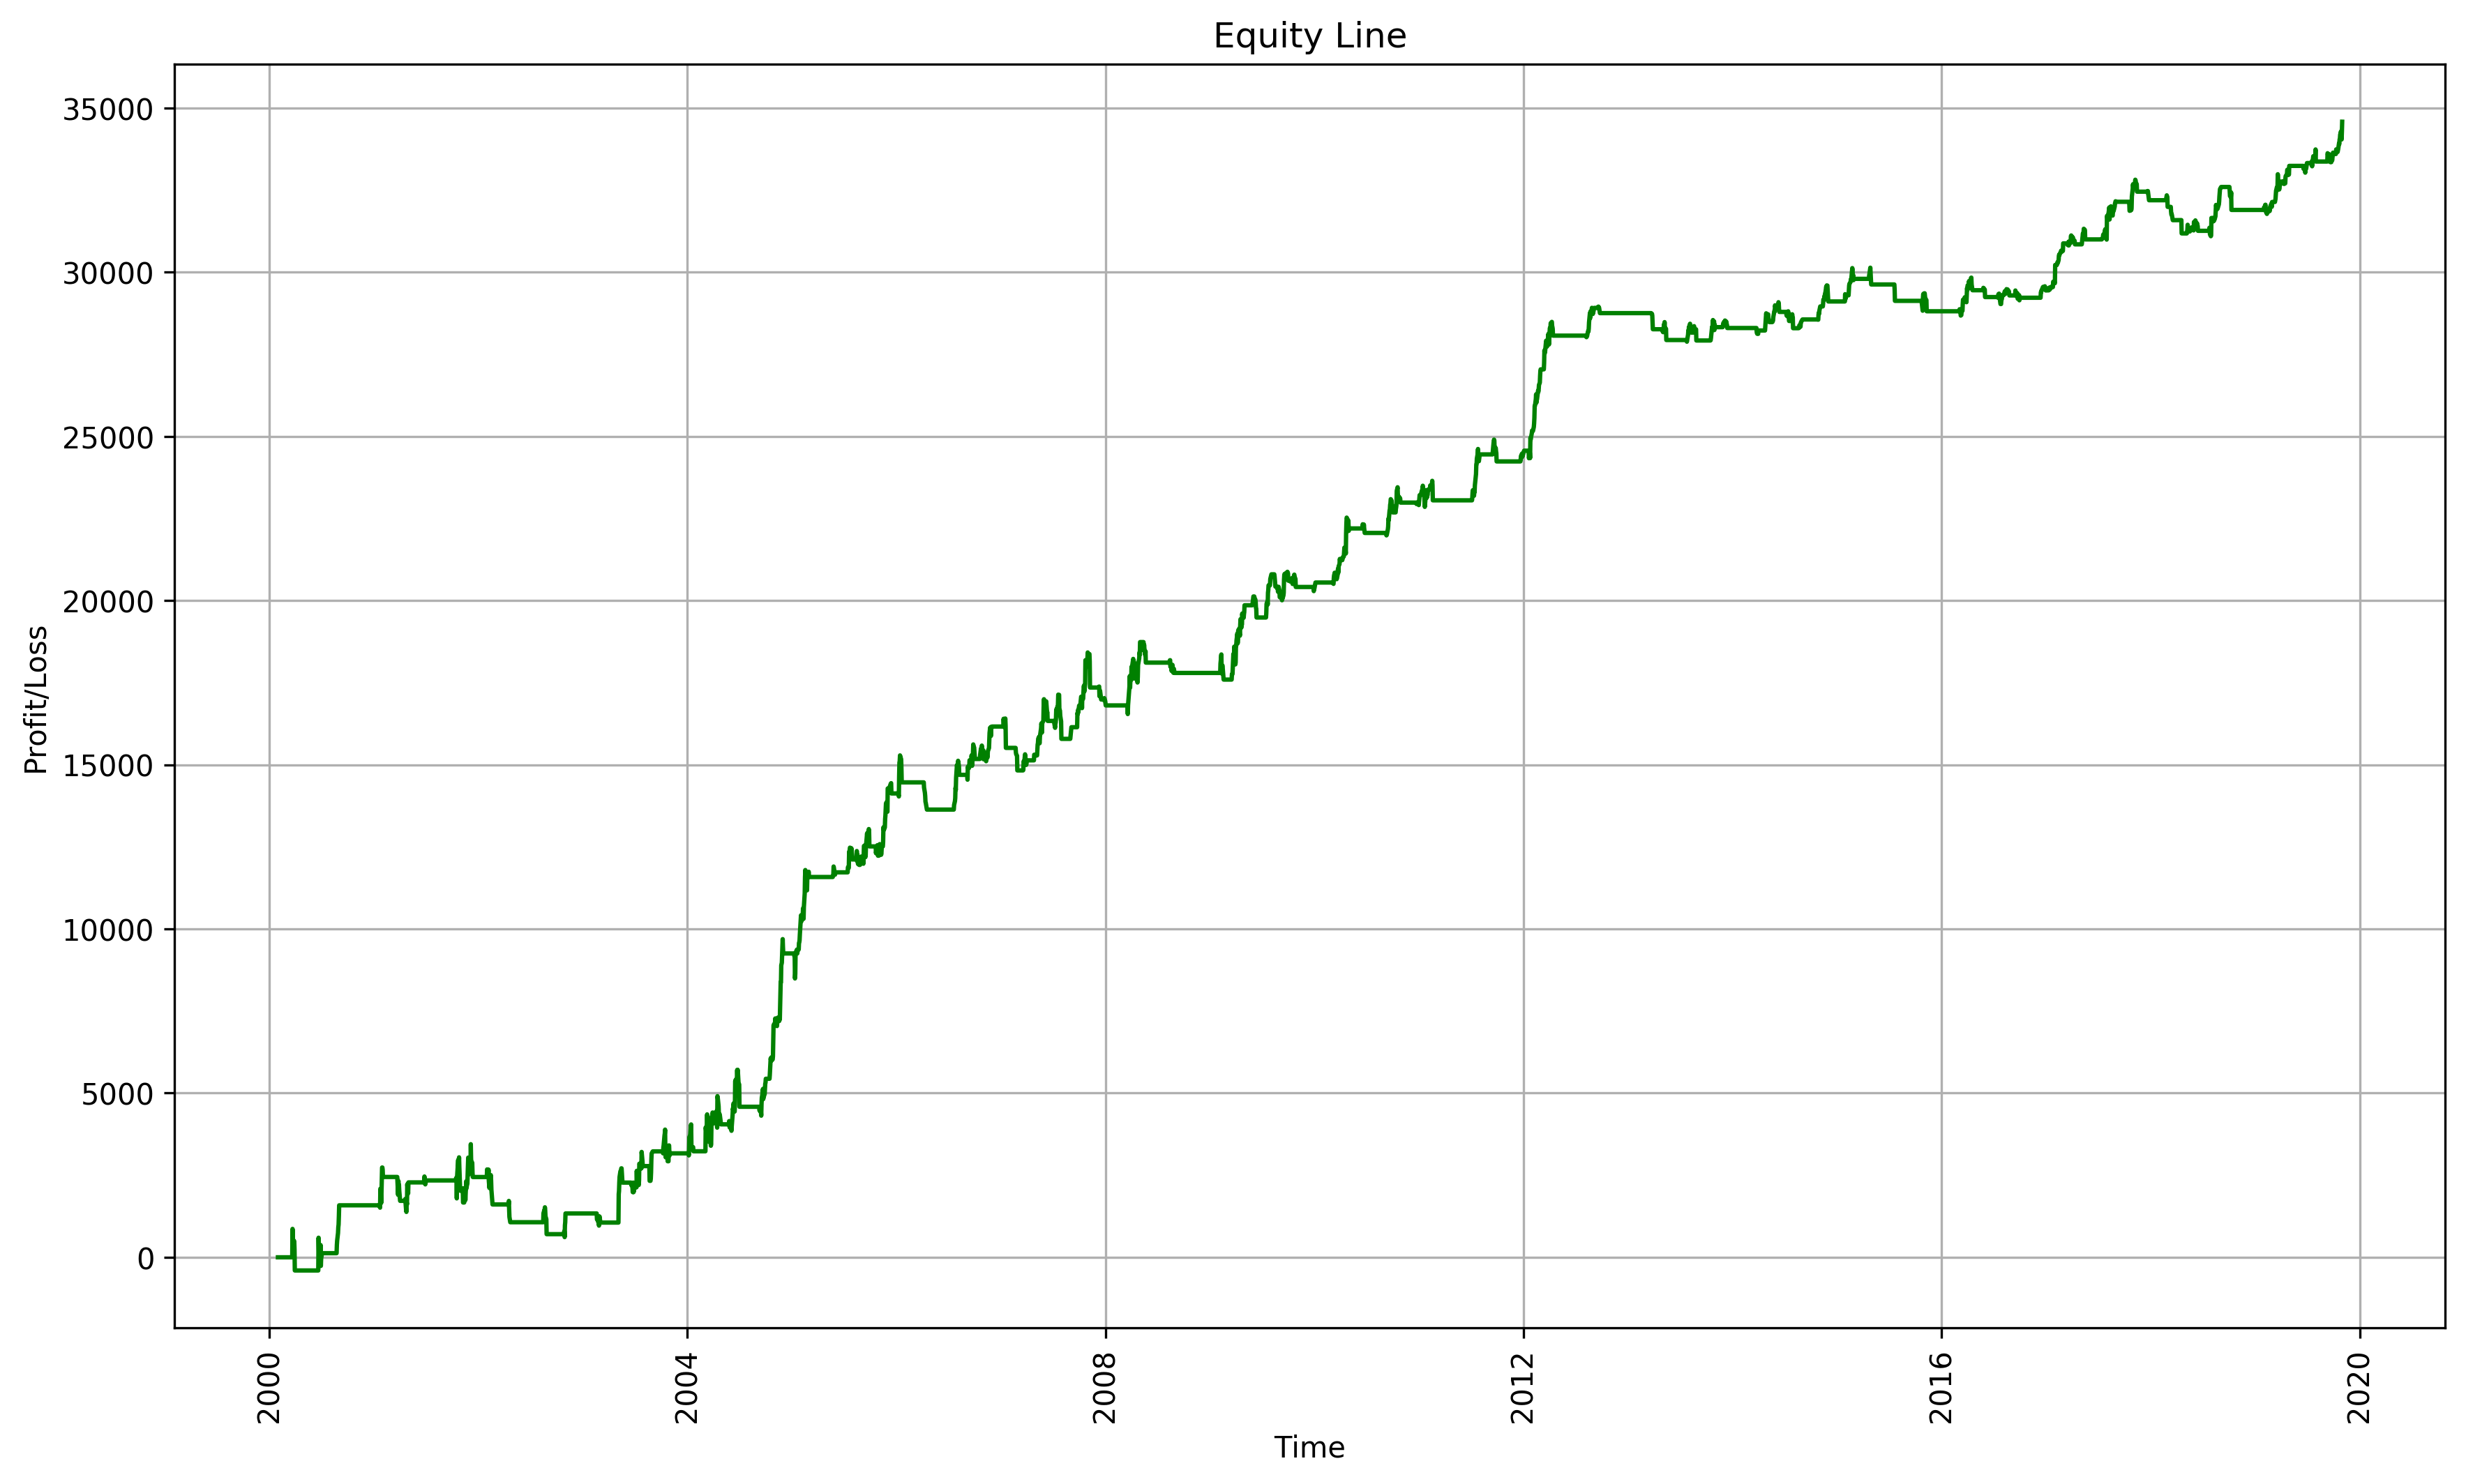

In [24]:
def plot_equity(equity,color):
    """
    Funzione per stampare un'equity line
    """
    plt.figure(figsize=(14, 8), dpi=300)
    plt.plot(equity, color=color)
    plt.xlabel("Time")
    plt.ylabel("Profit/Loss")
    plt.title('Equity Line')
    plt.xticks(rotation='vertical')
    plt.grid(True)
    plt.show()
    return

plot_equity(trading_system.open_equity,"green");

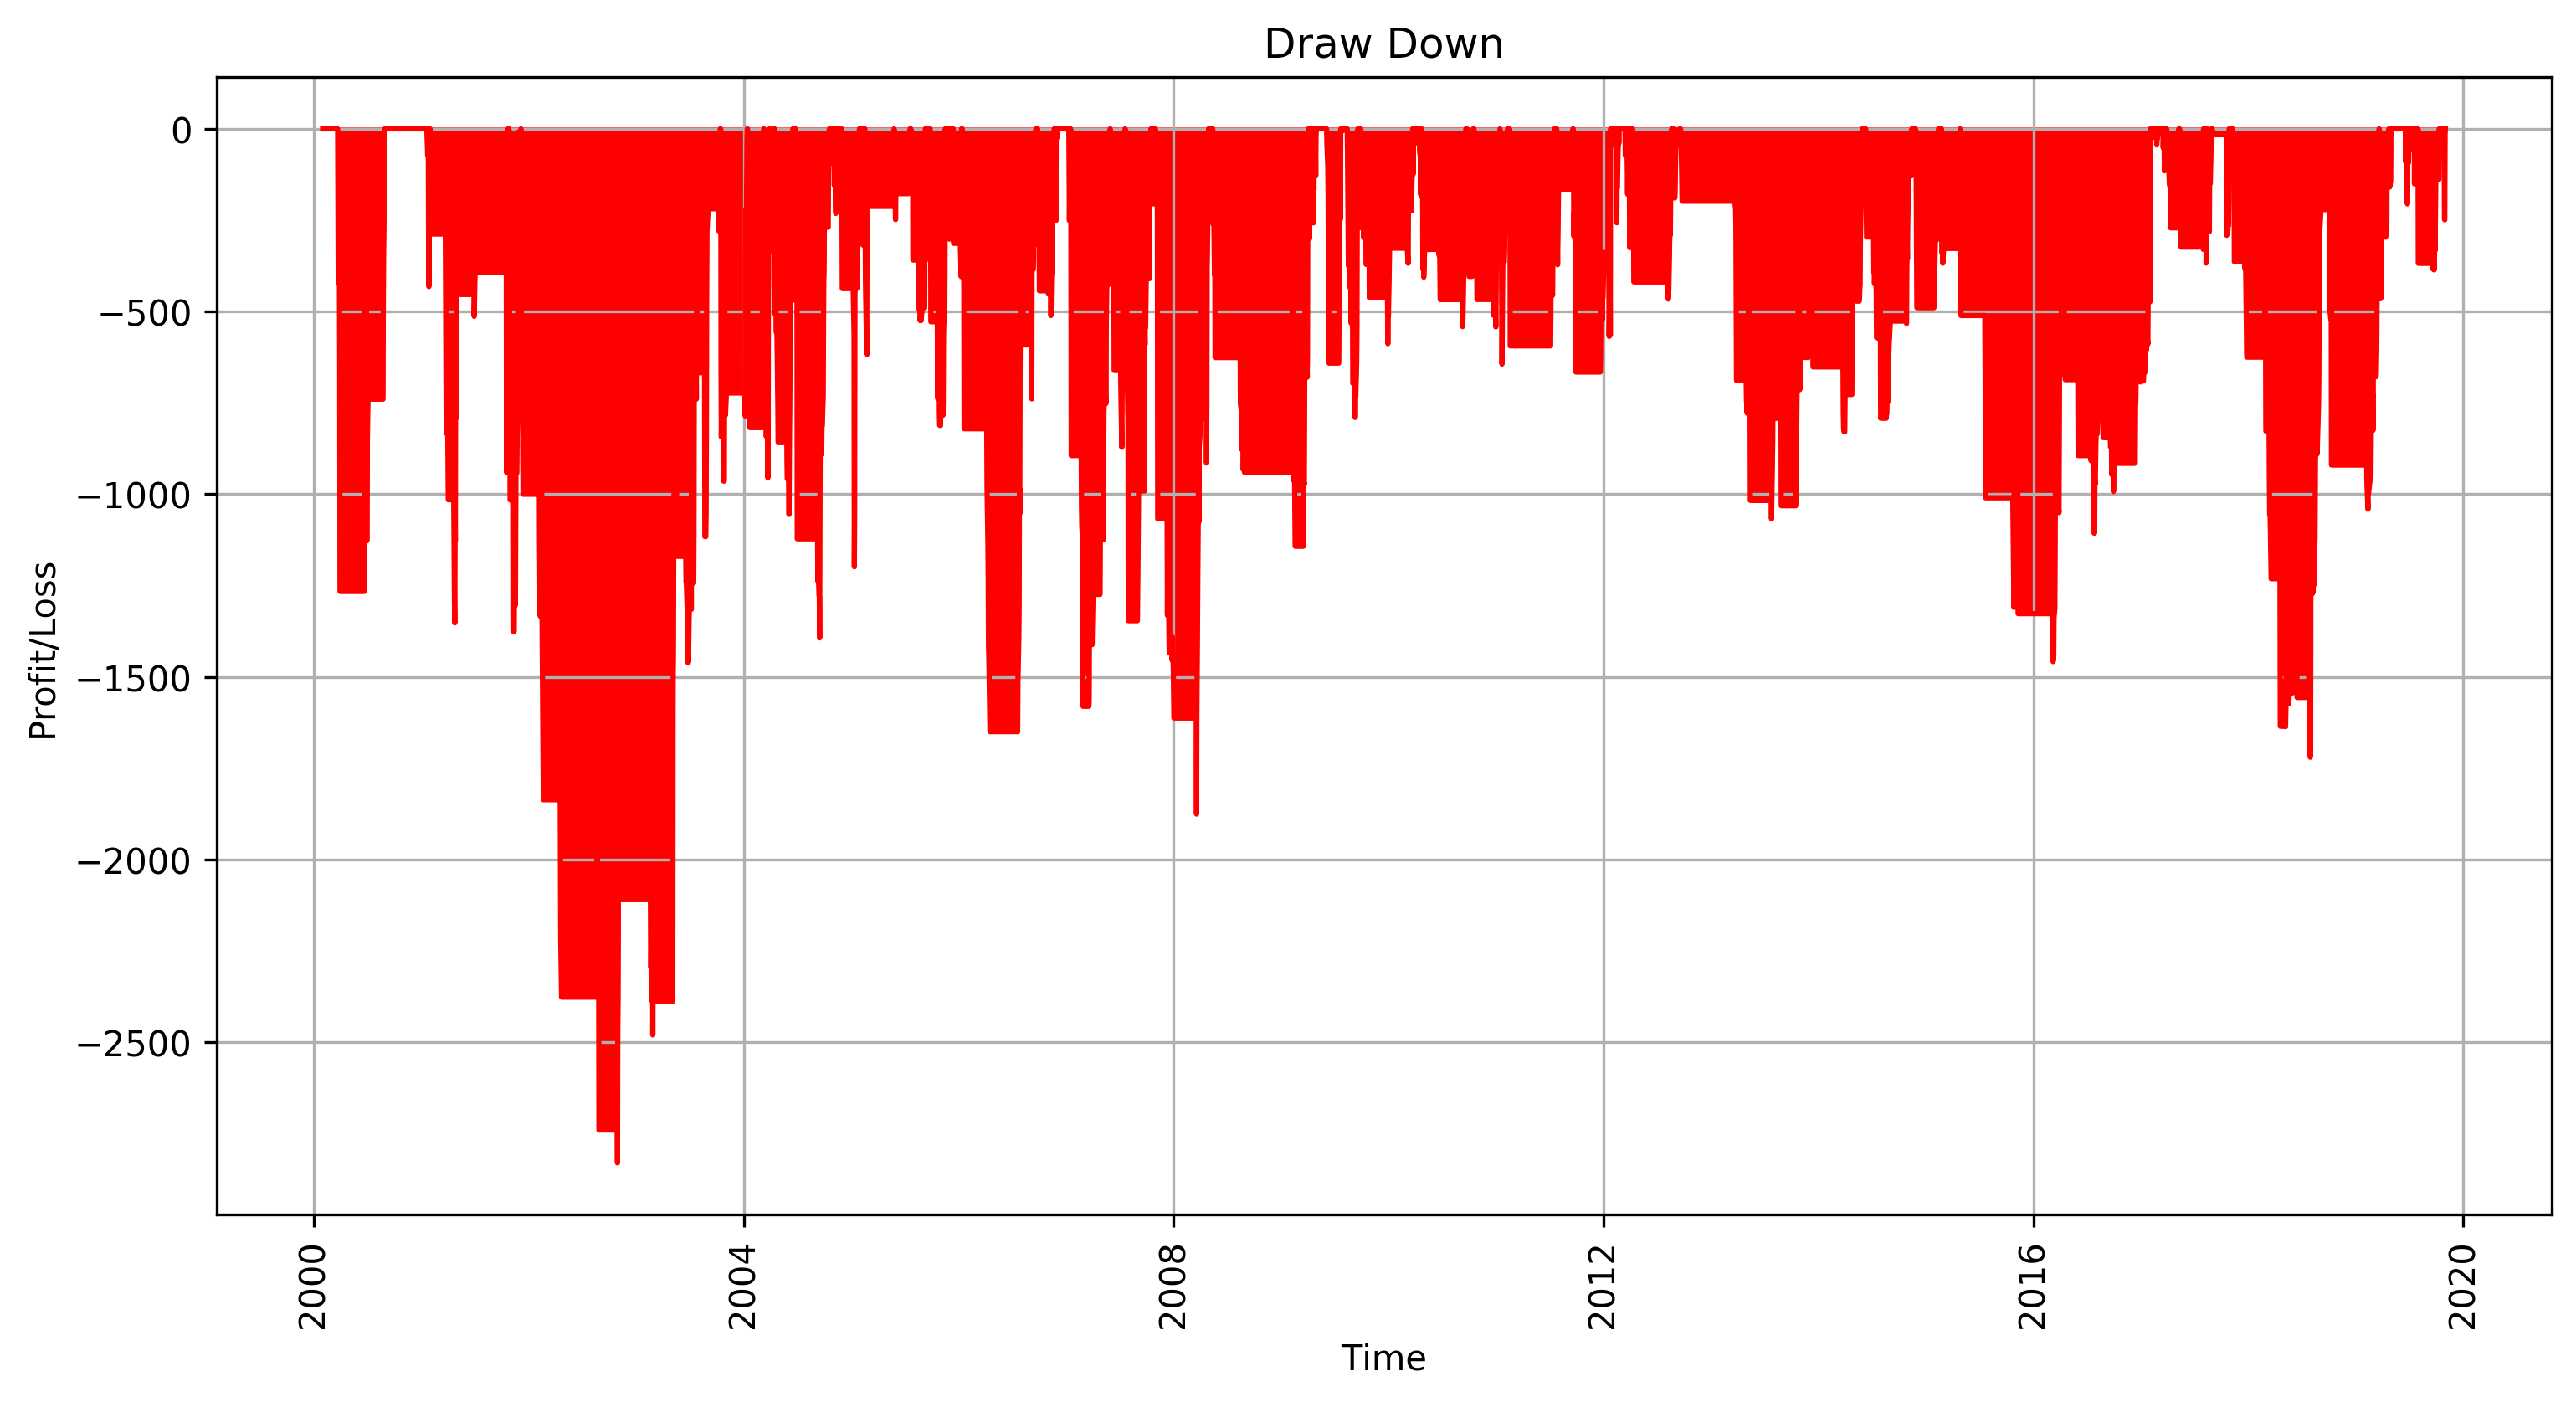

In [25]:
def drawdown(equity):
    """
    Funzione che calcola il draw down data un'equity line
    """
    maxvalue = equity.expanding(0).max()
    drawdown = equity - maxvalue
    drawdown_series = pd.Series(drawdown, index = equity.index)
    return drawdown_series

def plot_drawdown(equity,color):
    """
    Funzione per graficare la curva di draw down
    """
    dd = drawdown(equity)
    plt.figure(figsize = (12, 6), dpi = 300)
    plt.plot(dd, color = color)
    plt.fill_between(dd.index, 0, dd, color = color)
    plt.xlabel("Time")
    plt.ylabel("Profit/Loss")
    plt.title('Draw Down')
    plt.xticks(rotation='vertical')
    plt.grid(True)
    plt.show()
    return

plot_drawdown(trading_system.open_equity,"red")

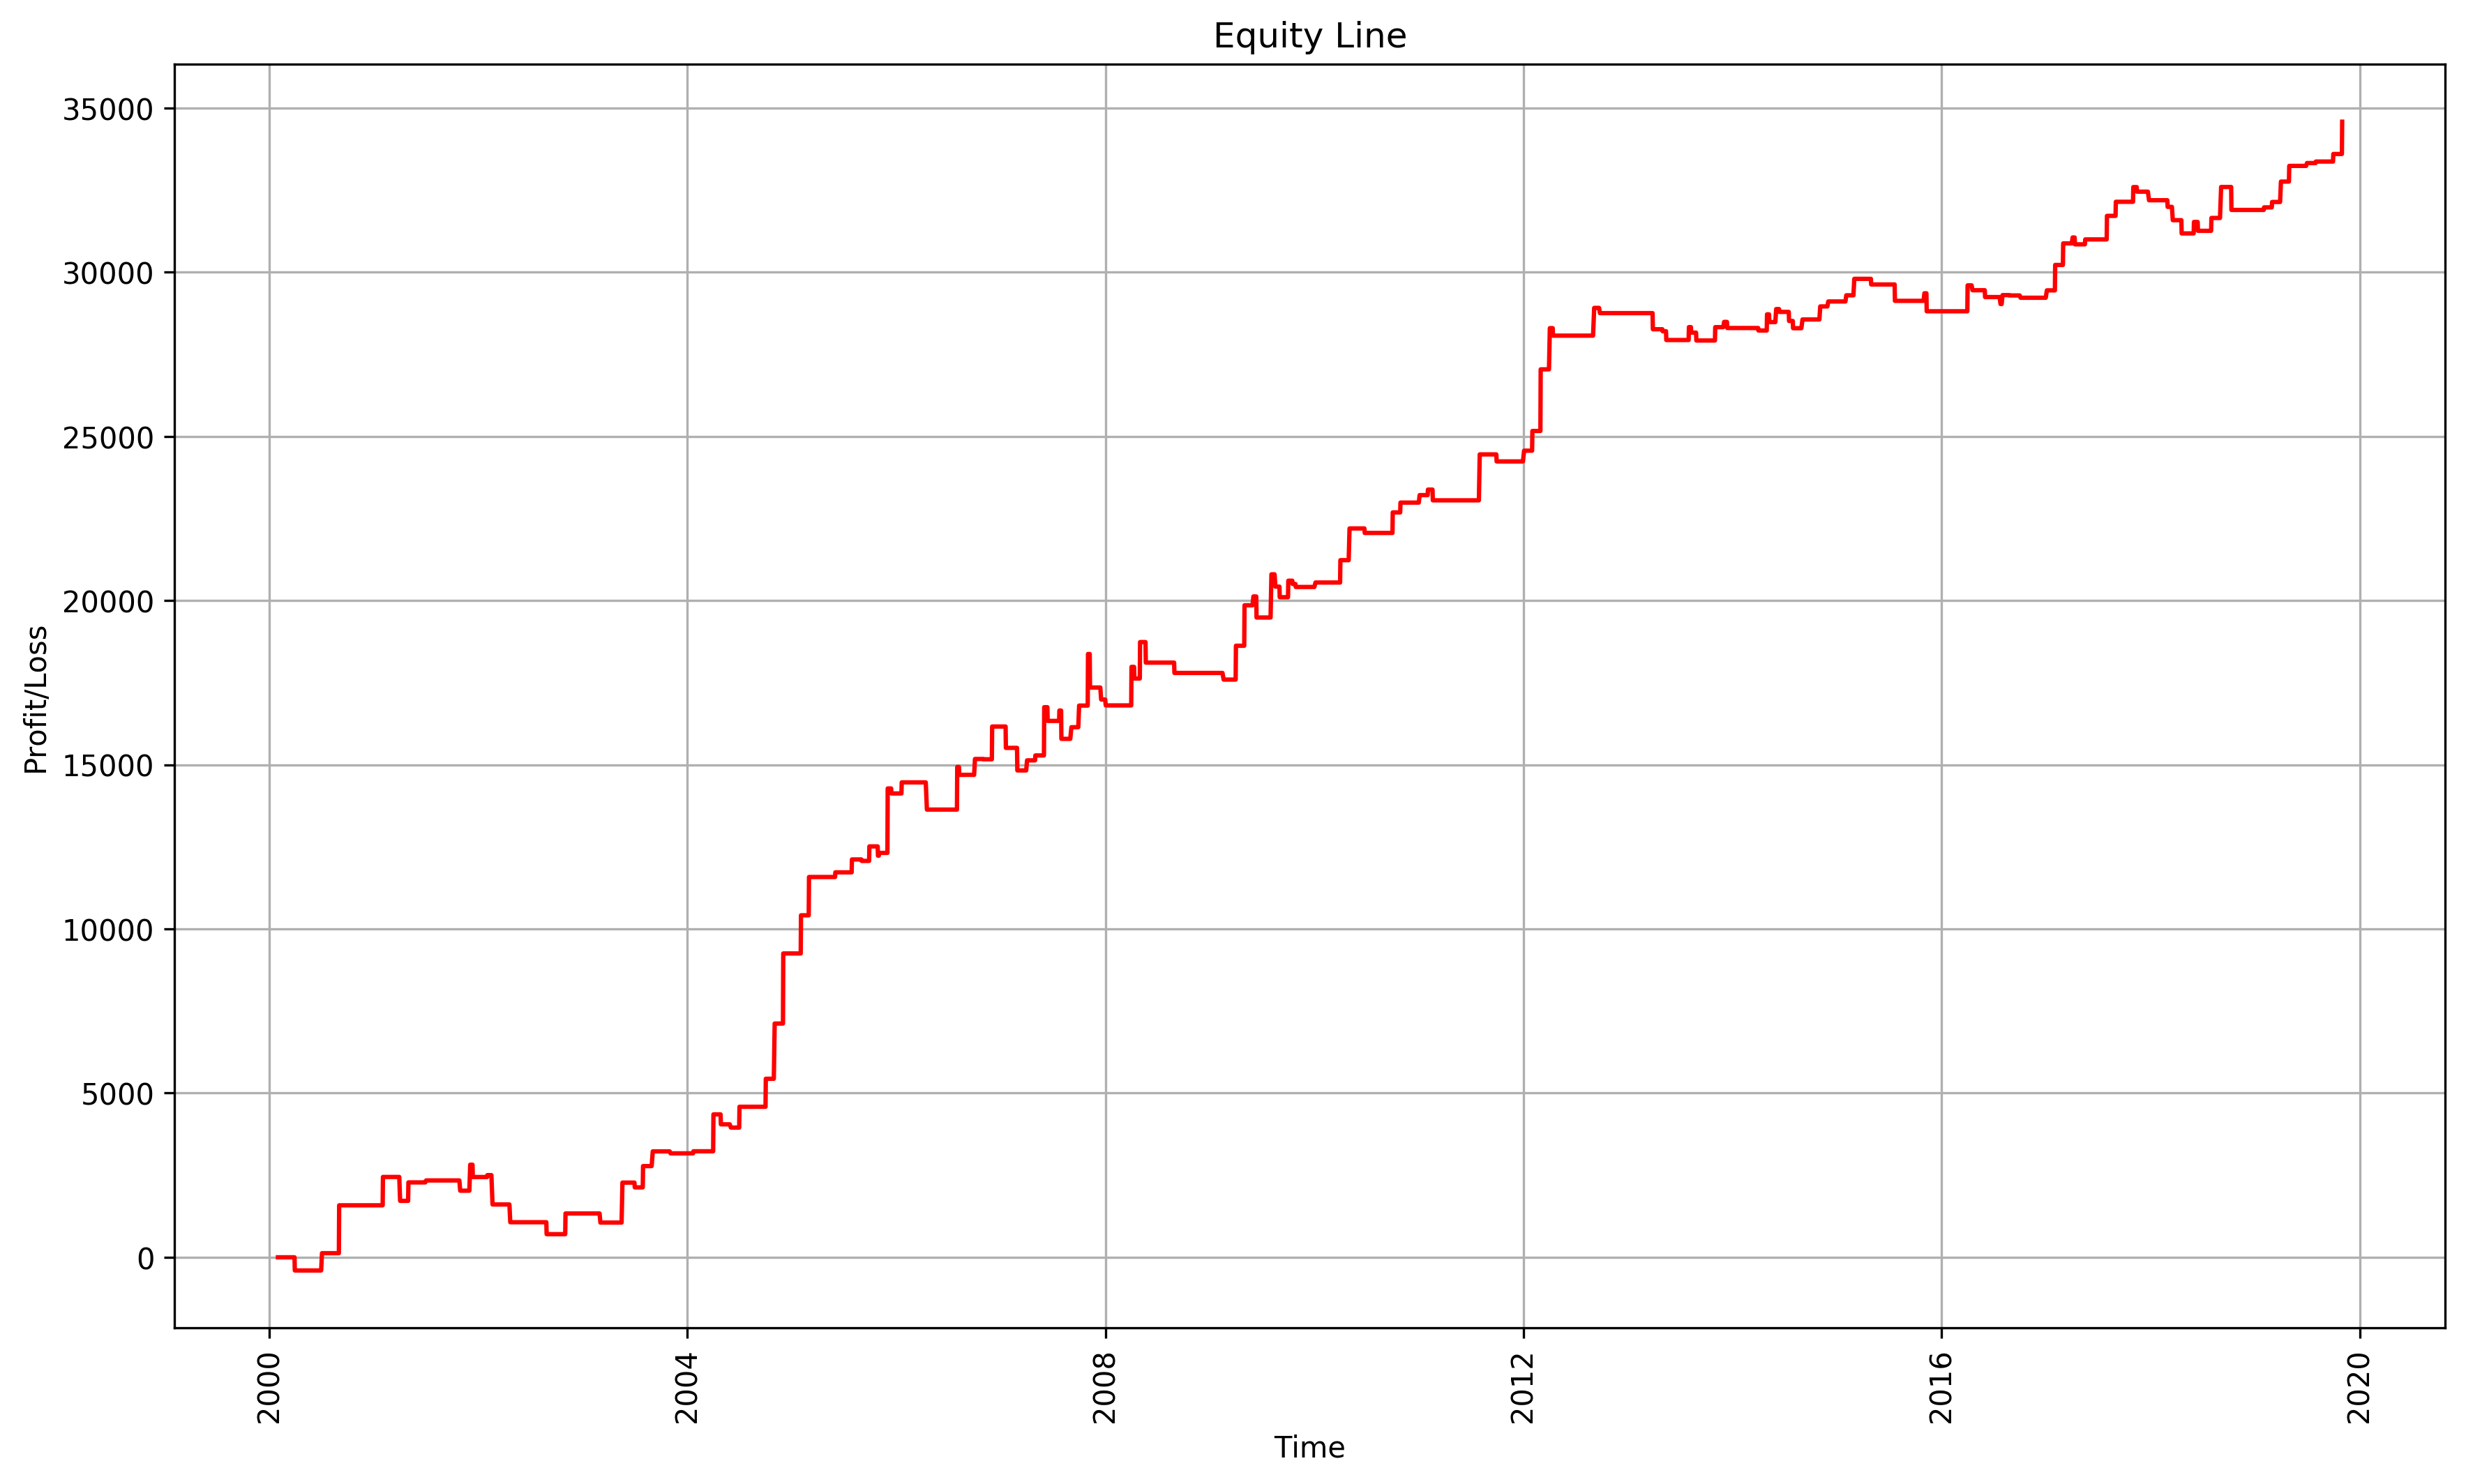

In [26]:
plot_equity(trading_system.closed_equity,"red");

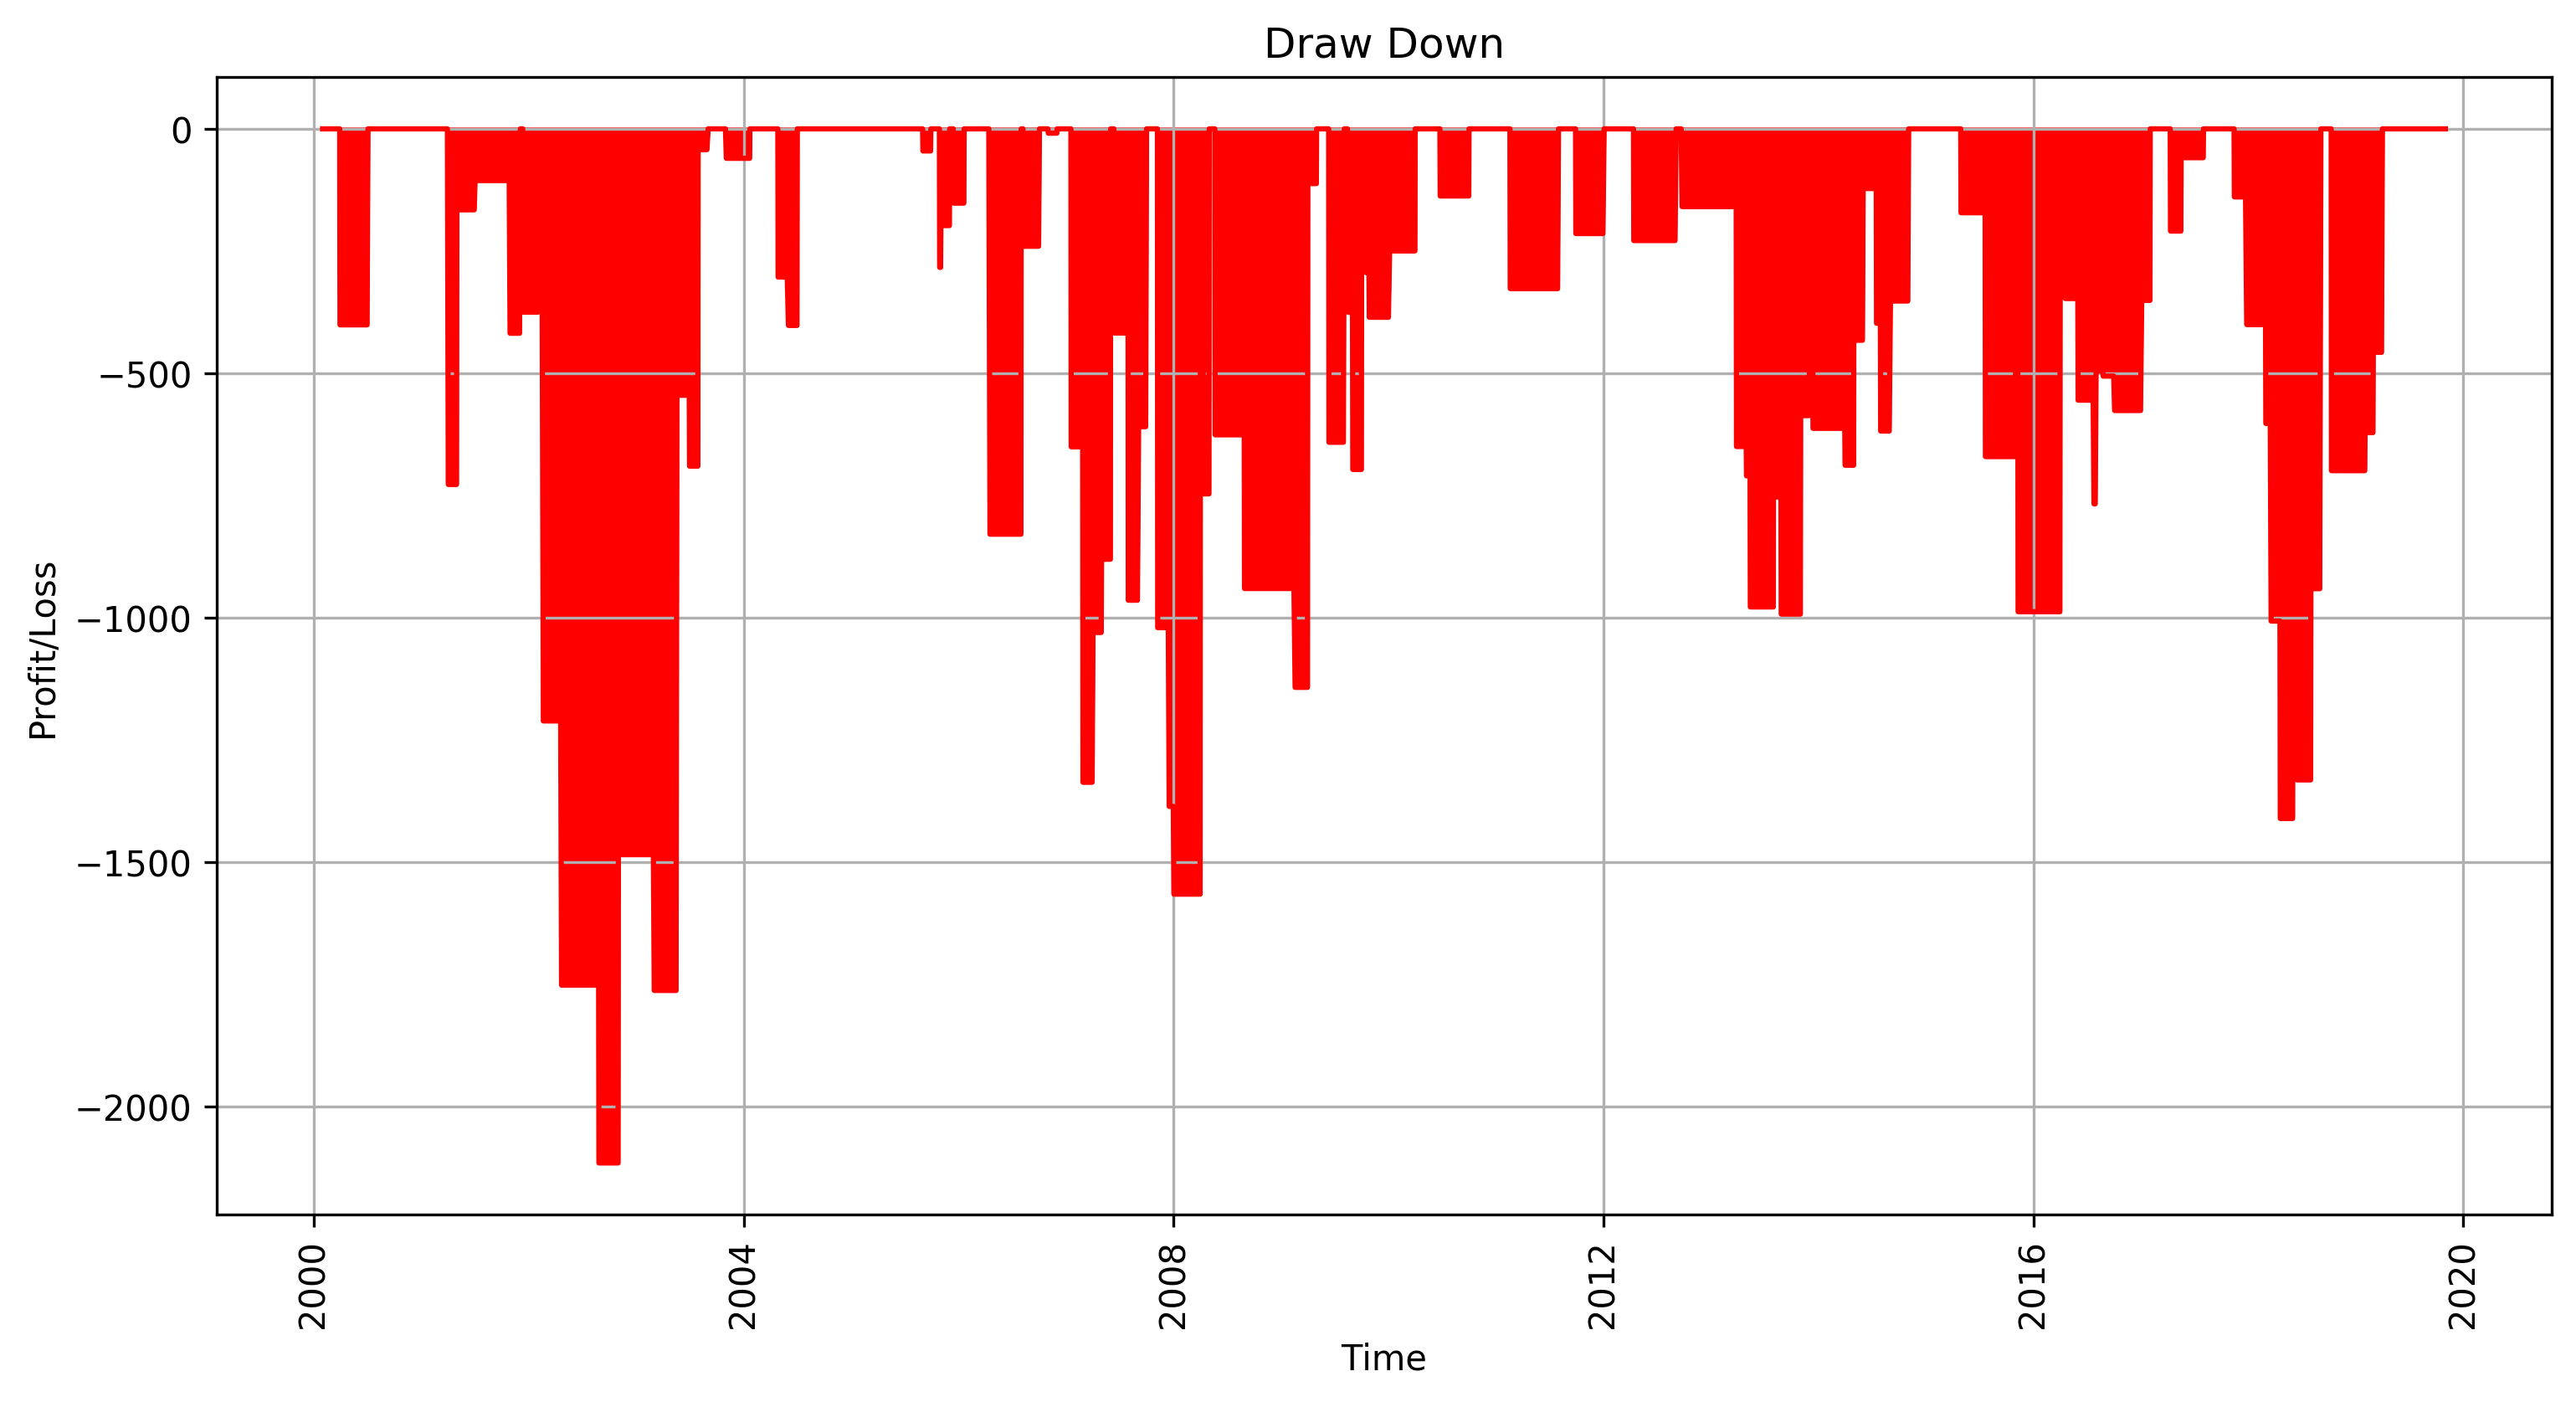

In [27]:
plot_drawdown(trading_system.closed_equity,"red");

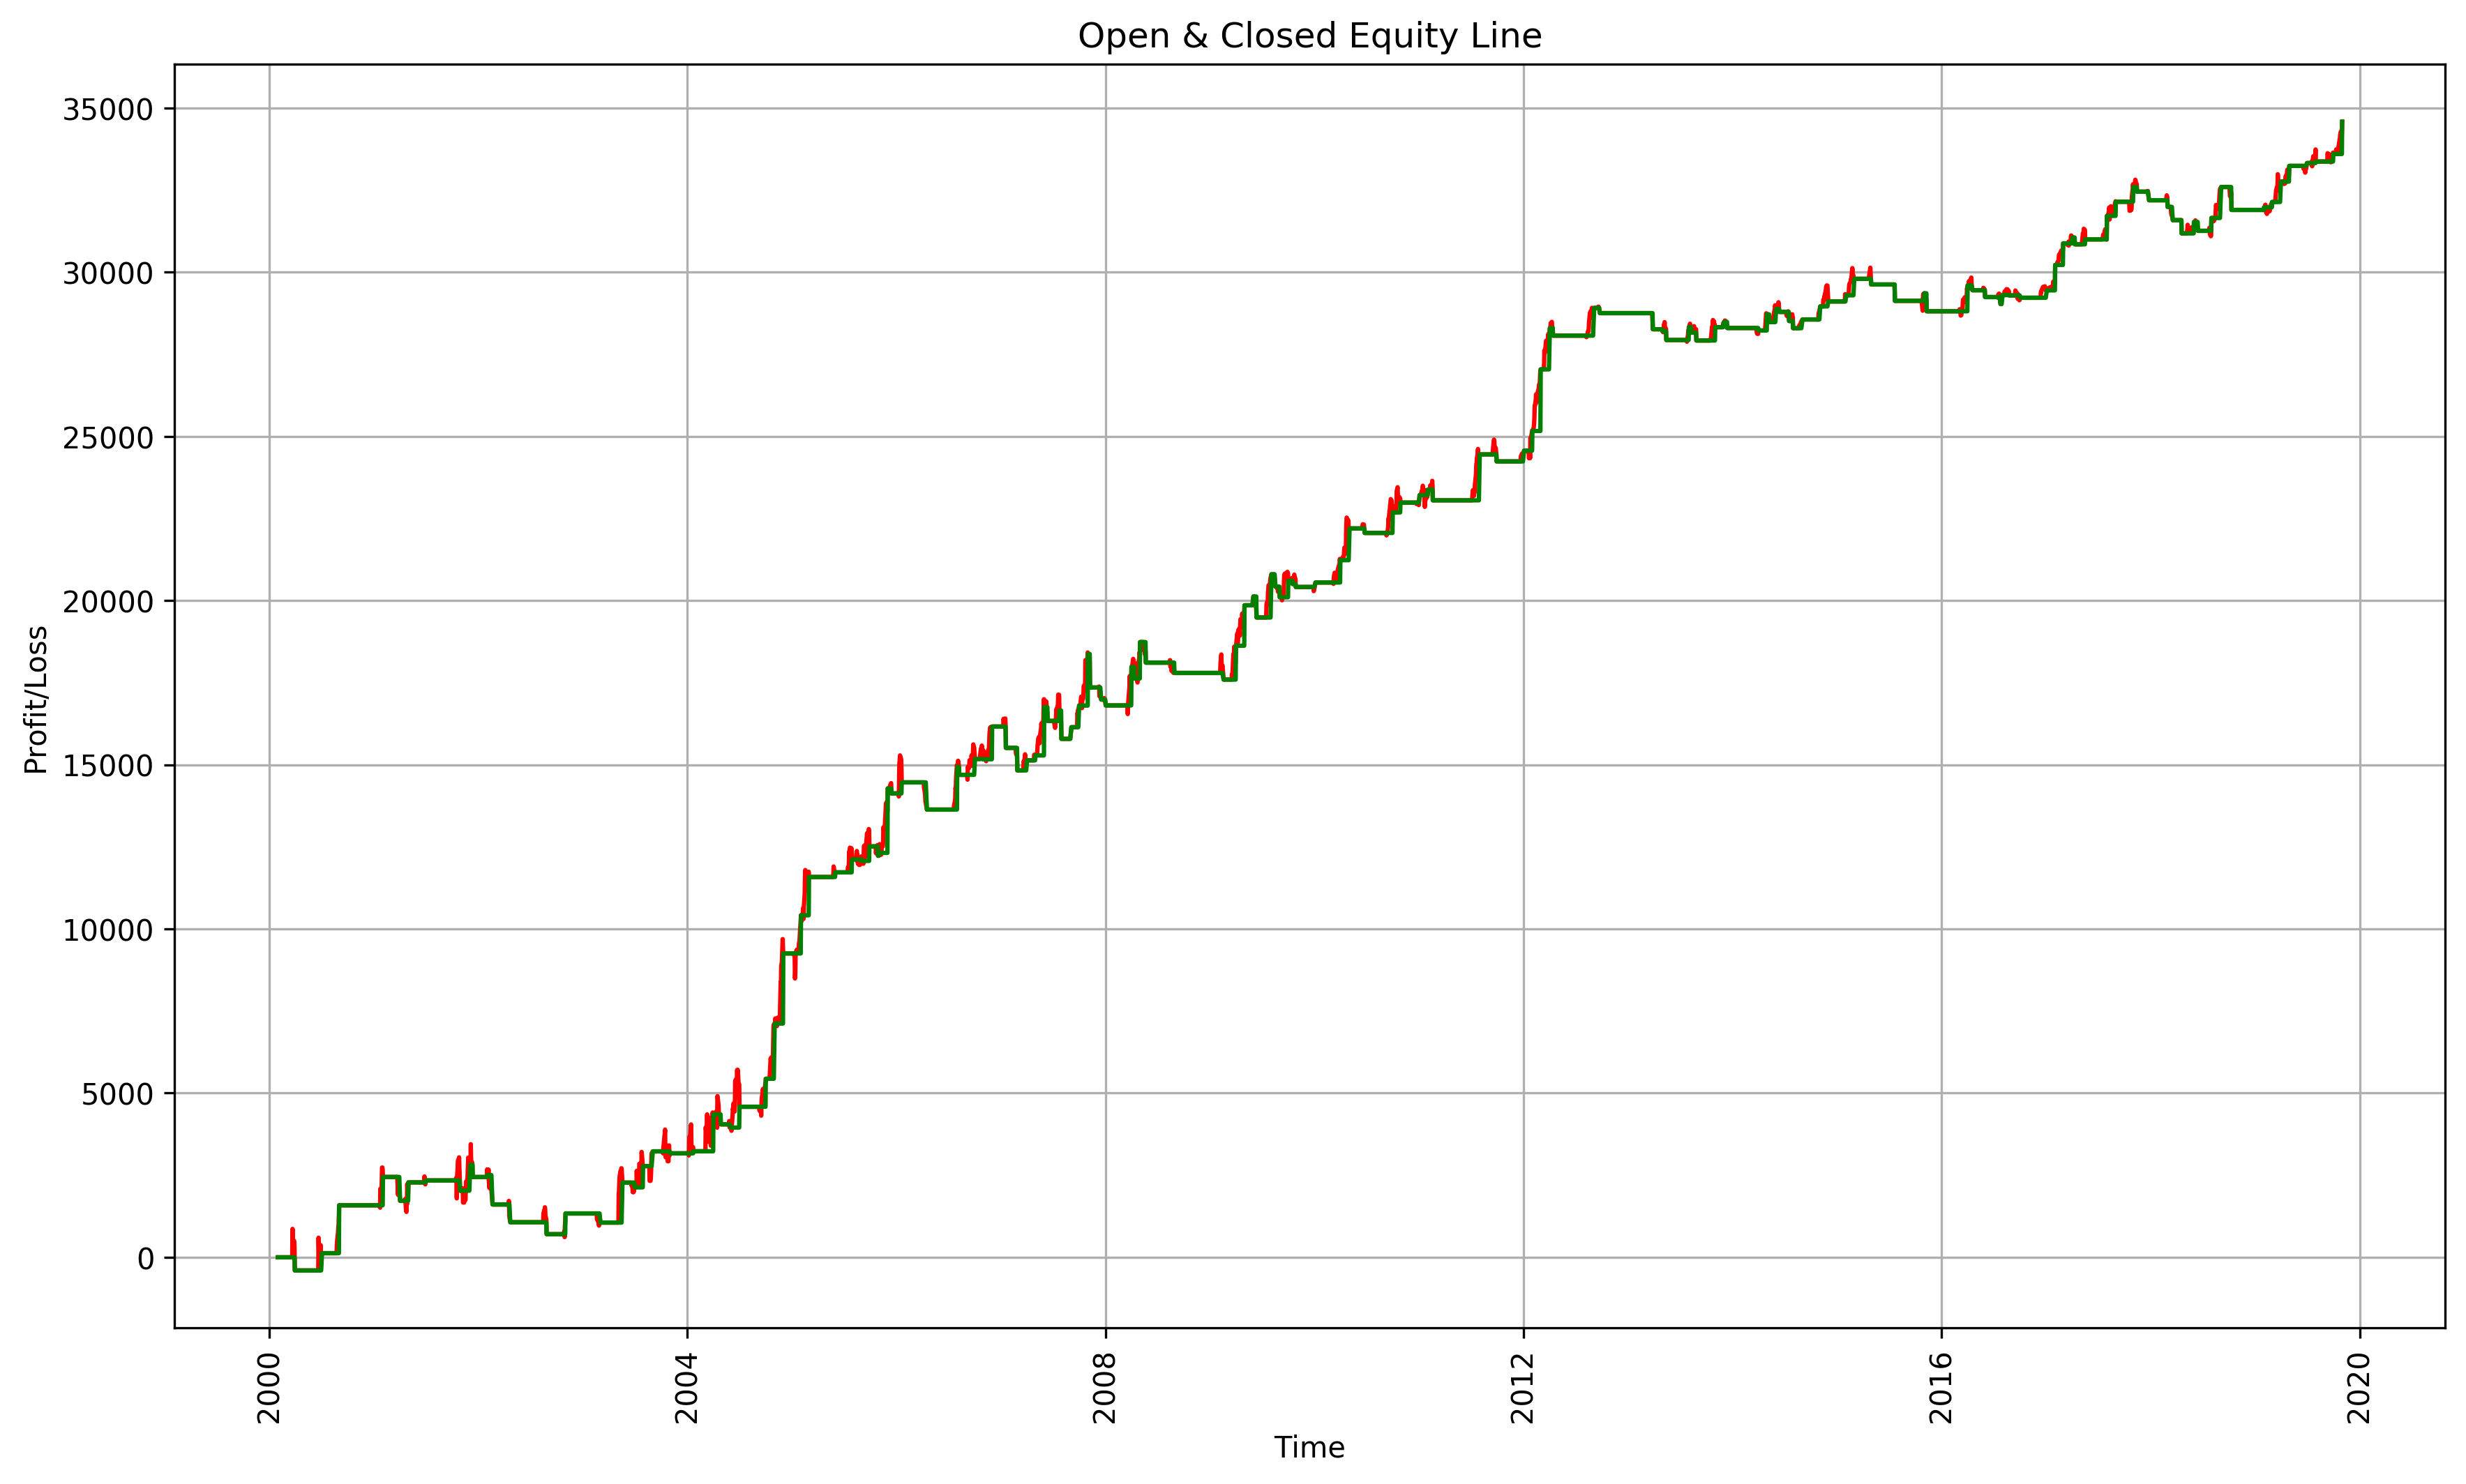

In [28]:
def plot_double_equity(closed_equity,open_equity):
    """
    Funzione per stampare due equity sovrapposte
    """
    plt.figure(figsize=(14, 8), dpi=300)
    plt.plot(open_equity, color='red')
    plt.plot(closed_equity, color='green')
    plt.xlabel("Time")
    plt.ylabel("Profit/Loss")
    plt.title('Open & Closed Equity Line')
    plt.xticks(rotation='vertical')
    plt.grid(True)
    plt.show()
    return

plot_double_equity(trading_system.closed_equity,trading_system.open_equity);

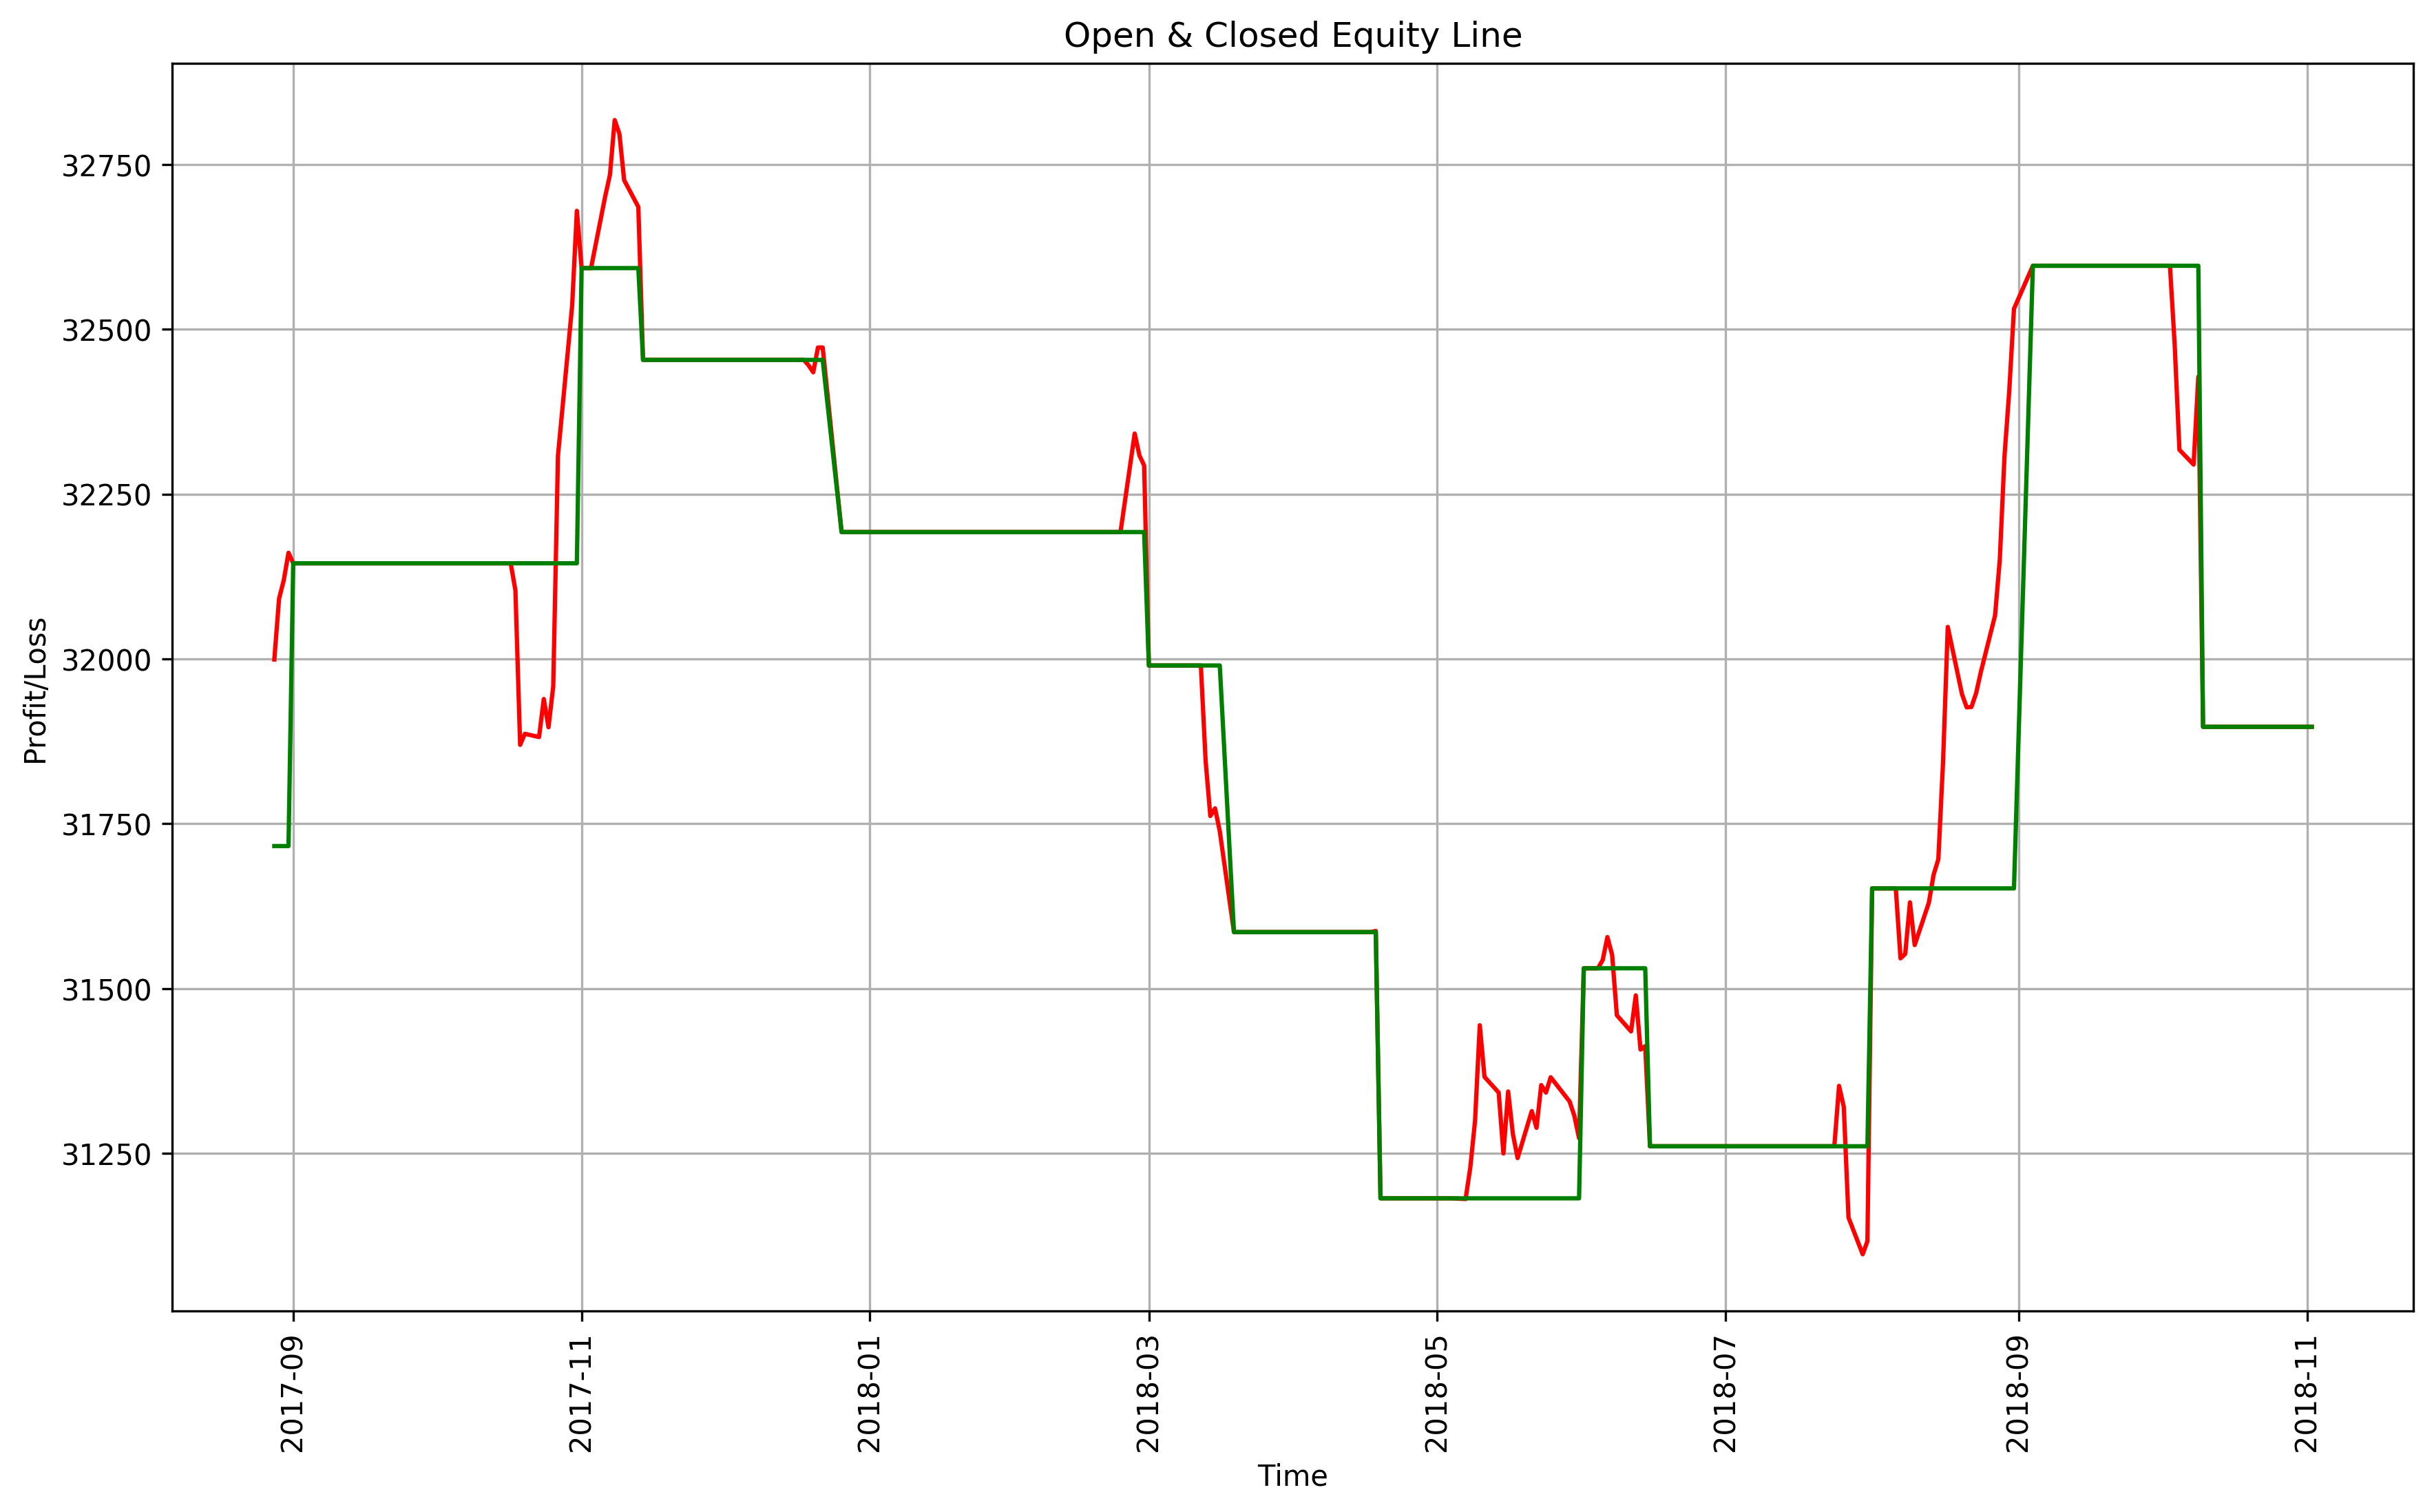

In [29]:
plot_double_equity(trading_system.closed_equity[-550:-250],trading_system.open_equity[-550:-250]);

In [30]:
def profit(equity):
    return round(equity[-1],2)

profit(trading_system.open_equity)

34583.66

In [31]:
profit(trading_system.closed_equity)

34583.66

In [32]:
operations = trading_system.operations.dropna()
operations.tail(10)

date
2018-09-04    944.16
2018-10-10   -699.18
2019-02-01     78.00
2019-03-01    164.14
2019-04-01    621.04
2019-04-30    478.00
2019-07-01     86.50
2019-08-01     46.06
2019-10-01    229.54
2019-11-01    983.41
Name: operations, dtype: float64

In [33]:
def operation_number(operations):
    return operations.count()

operation_number(operations)

153

In [34]:
def avg_trade(operations):
    return round(operations.mean(),2)

avg_trade(operations)

226.04

In [35]:
def max_draw_down(equity):
    dd = drawdown(equity)
    return round(dd.min(),2)

max_draw_down(trading_system.open_equity)

-2830.35

In [36]:
max_draw_down(trading_system.closed_equity)

-2115.26

In [37]:
max_draw_down(operations.cumsum())

-2115.26

In [38]:
def avgdrawdown_nozero(equity):
    """
    calcola la media del draw down storico
    non considerando i valori nulli (nuovi massimi di equity line)
    """
    dd = drawdown(equity)
    return round(dd[dd < 0].mean(),2)

avgdrawdown_nozero(trading_system.open_equity)

-747.35

In [39]:
avgdrawdown_nozero(trading_system.closed_equity)

-636.2

In [40]:
def avg_loss(operations):
    return round(operations[operations < 0].mean(),2)

avg_loss(operations)

-319.58

In [41]:
def max_loss(operations):
    return round(operations.min(),2)

max_loss(operations)

-1020.26

In [42]:
def max_loss_date(operations):
    return operations.idxmin()

max_loss_date(operations)

Timestamp('2007-11-08 00:00:00')

In [43]:
def avg_gain(operations):
    return round(operations[operations > 0].mean(),2)

avg_gain(operations)

639.95

In [44]:
def max_gain(operations):
    return round(operations.max(),2)

max_gain(operations)

2133.93

In [45]:
def max_gain_date(operations):
    return operations.idxmax()

max_gain_date(operations)

Timestamp('2004-12-01 00:00:00')

In [46]:
def gross_profit(operations):
    return round(operations[operations > 0].sum(),2)

gross_profit(operations)

55675.93

In [47]:
def gross_loss(operations):
    return round(operations[operations <= 0].sum(),2)

gross_loss(operations)

-21092.27

In [48]:
def profit_factor(operations):
    a = gross_profit(operations)
    b = gross_loss(operations)
    if b != 0:
        return round(abs(a / b), 2)
    else:
        return round(abs(a / 0.00000001), 2)

profit_factor(operations)

2.64

In [49]:
def percent_win(operations):
    return round((operations[operations > 0].count() / operations.count() * 100),2)

percent_win(operations)

56.86

In [50]:
def reward_risk_ratio(operations):
    if operations[operations <= 0].mean() != 0:
        return round((operations[operations > 0].mean() / -operations[operations <= 0].mean()),2)
    else:
        return np.inf

reward_risk_ratio(operations)

2.0

In [51]:
def delay_between_peaks_old(operations):
    """
    Funzione per calcolare la media dei ritracciamenti
    prima di toccare nuovi massimi
    (non la semplice media della serie dei draw down)
    """
    work_df = pd.DataFrame(operations, index = operations.index)
    work_df["drawdown"] = drawdown(operations)
    work_df["delay_elements"] = work_df["drawdown"].apply(lambda x: 1 if x < 0 else 0)
    work_df["resets"] = np.where(work_df["drawdown"] == 0, 1, 0)
    work_df['cumsum'] = work_df['resets'].cumsum()
    a = pd.Series(work_df['delay_elements'].groupby(work_df['cumsum']).cumsum())
    return a

In [52]:
def delay_between_peaks(equity):
    """
    Funzione per calcolare i ritardi istantanei in barre
    nel conseguire nuovi massimi di equity line
    Input: equity line
    """
    work_df = pd.DataFrame(equity, index = equity.index)
    work_df["drawdown"] = drawdown(equity)
    work_df["delay_elements"] = work_df["drawdown"].apply(lambda x: 1 if x < 0 else 0)
    work_df["resets"] = np.where(work_df["drawdown"] == 0, 1, 0)
    work_df['cumsum'] = work_df['resets'].cumsum()
    #print(work_df.iloc[-20:,:])
    a = pd.Series(work_df['delay_elements'].groupby(work_df['cumsum']).cumsum())
    return a

def max_delay_between_peaks(equity):
    """
    Funzione per calcolare il più lungo ritardo in barre dall'ultimo massimo
    Input: equity line
    """
    a = delay_between_peaks(equity)
    return a.max()

max_delay_between_peaks(trading_system.open_equity)

465

In [53]:
def avg_delay_between_peaks(equity):
    """
    Funzione per calcolare il ritardo medio in barre
    nel conseguire nuovi massimi di equity line
    Input: equity line
    """
    work_df = pd.DataFrame(equity, index = equity.index)
    work_df["drawdown"] = drawdown(equity)
    work_df["delay_elements"] = work_df["drawdown"].apply(lambda x: 1 if x < 0 else np.nan)
    work_df["resets"] = np.where(work_df["drawdown"] == 0, 1, 0)
    work_df['cumsum'] = work_df['resets'].cumsum()
    work_df.dropna(inplace = True)
    a = work_df['delay_elements'].groupby(work_df['cumsum']).sum()
    return round(a.mean(),2)

avg_delay_between_peaks(trading_system.open_equity)

39.58

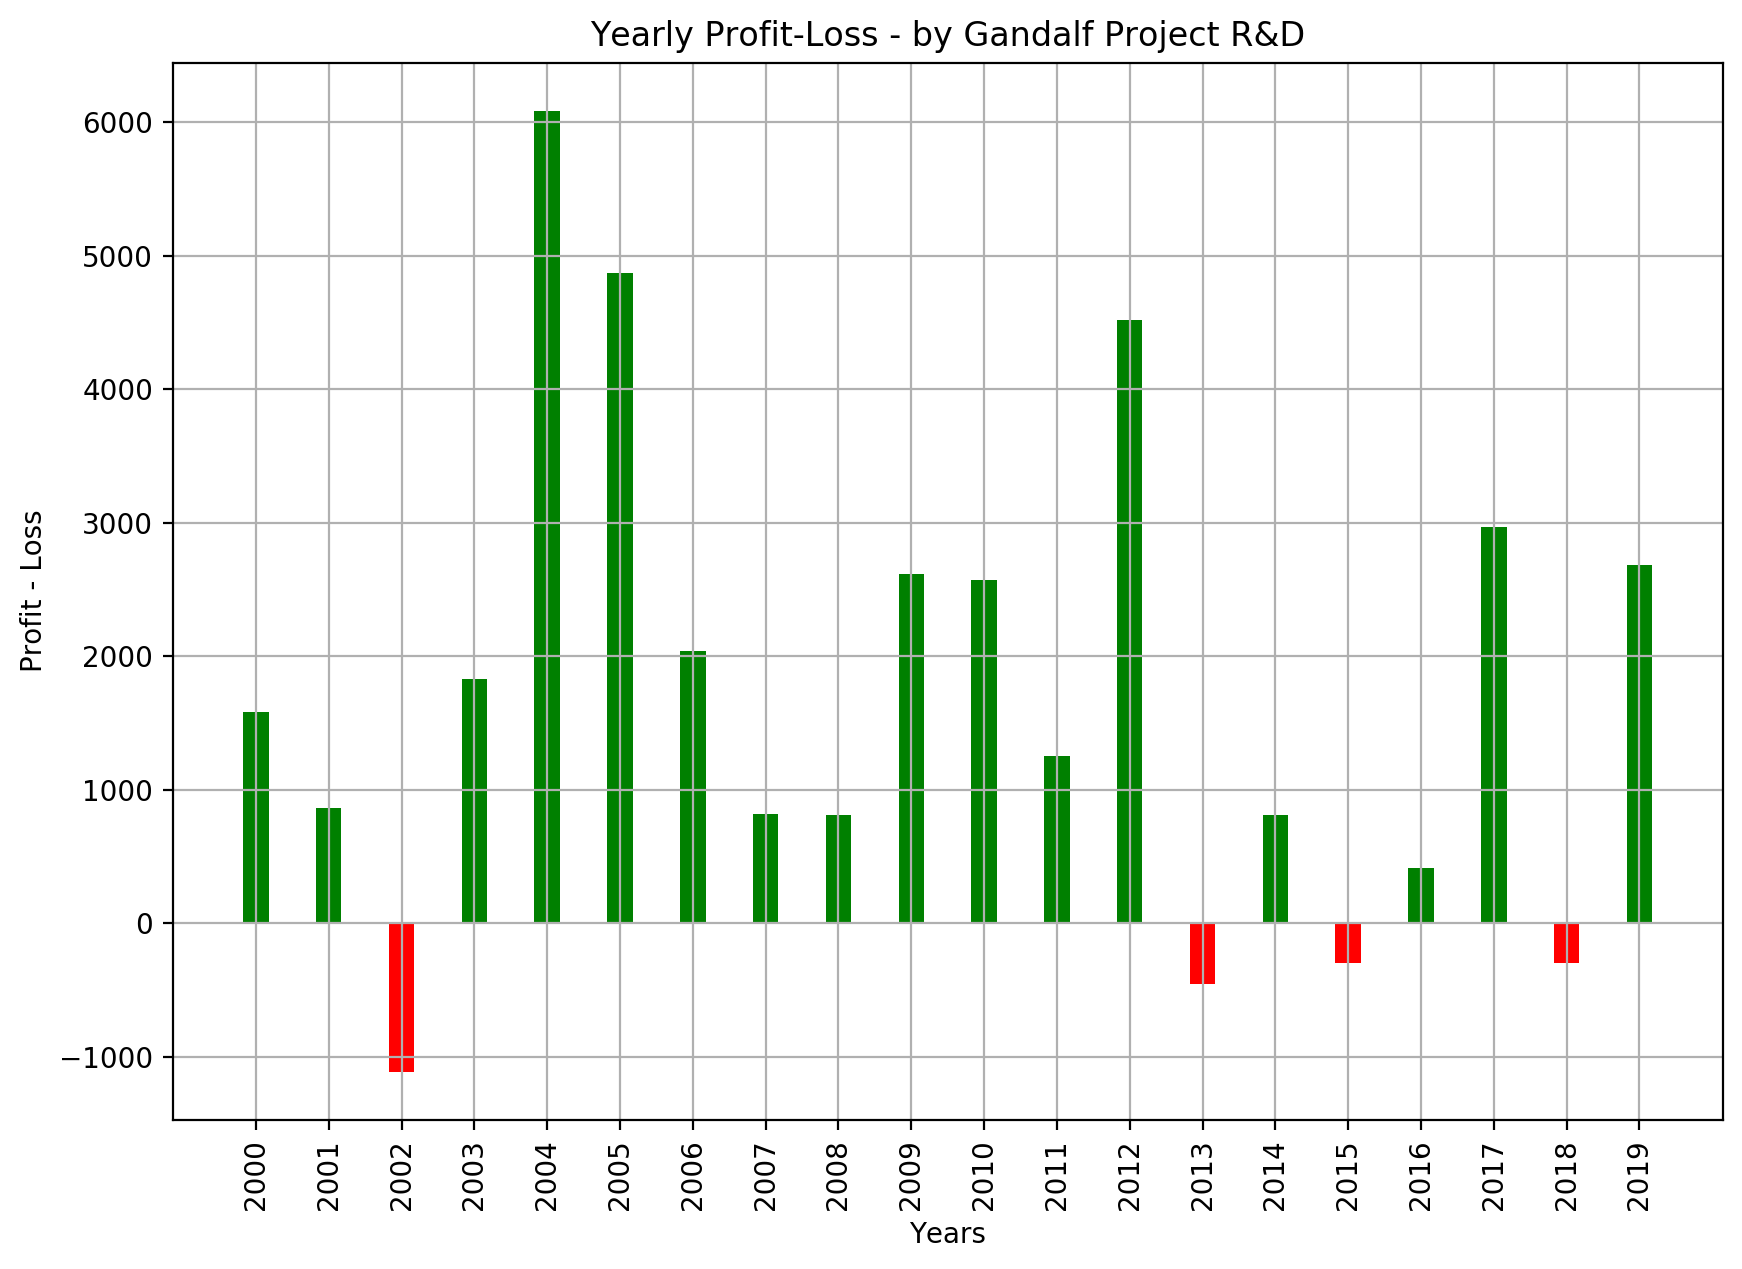

In [54]:
def plot_annual_histogram(operations):
    yearly = operations.resample('A').sum()
    colors = pd.Series()
    colors = yearly.apply(lambda x: "green" if x > 0 else "red")
    n_groups = len(yearly)
    plt.subplots(figsize=(10, 7), dpi=200)
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1

    rects1 = plt.bar(index,
                     yearly,
                     bar_width,
                     alpha=opacity,
                     color=colors,
                     label='Yearly Statistics')

    plt.xlabel('Years')
    plt.ylabel('Profit - Loss')
    plt.title('Yearly Profit-Loss - by Gandalf Project R&D')
    plt.xticks(index, yearly.index.year, rotation=90)
    plt.grid(True)
    plt.show()
    return

plot_annual_histogram(operations)

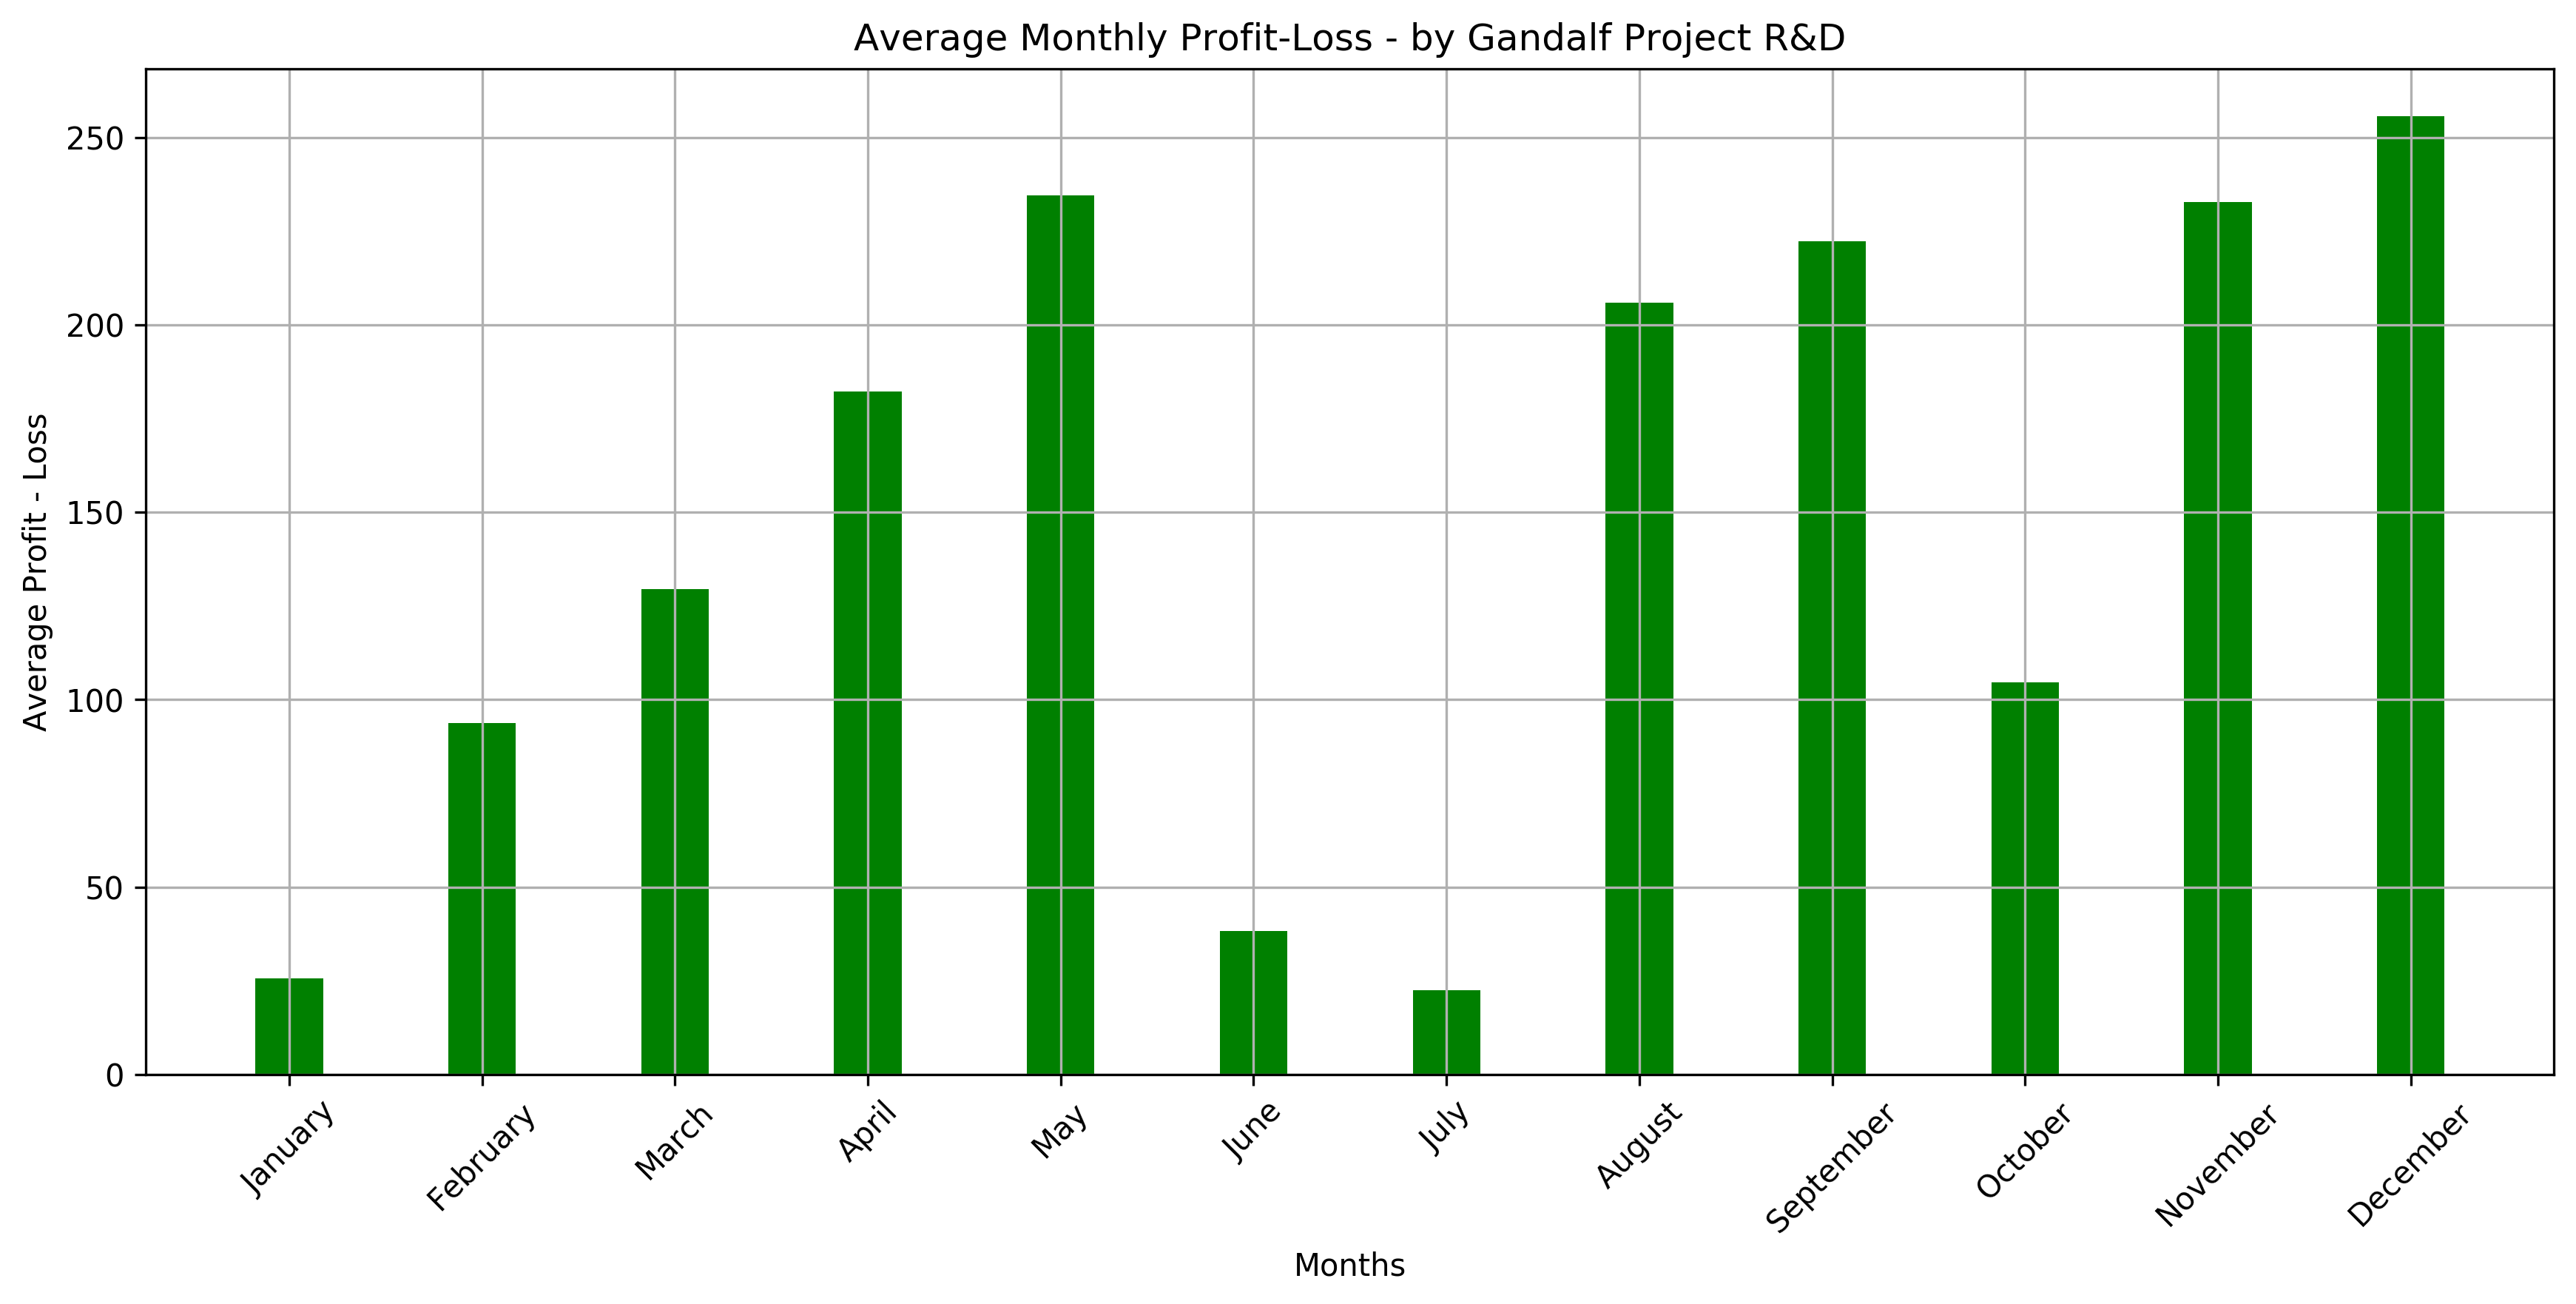

In [55]:
def plot_monthly_bias_histogram(operations):
    monthly = pd.DataFrame(operations.fillna(0)).resample('M').sum()
    monthly['Month'] = monthly.index.month
    biasMonthly = []
    months = []

    for month in range(1, 13):
        months.append(month)
    for month in months:
        biasMonthly.append(monthly[(monthly['Month'] == month)].mean())

    biasMonthly = pd.DataFrame(biasMonthly)
    column = biasMonthly.columns[0]
    colors = pd.Series()
    colors = biasMonthly[column].apply(lambda x: "green" if x > 0 else "red")
    n_groups = len(biasMonthly)
    plt.subplots(figsize=(14, 6), dpi=300)
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1

    rects1 = plt.bar(index,
                     biasMonthly[column],
                     bar_width,
                     alpha=opacity,
                     color=colors,
                     label='Yearly Statistics')

    plt.xlabel('Months')
    plt.ylabel('Average Profit - Loss')
    plt.title('Average Monthly Profit-Loss - by Gandalf Project R&D')
    months_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September",
                    "October", "November", "December"]
    plt.xticks(index, months_names, rotation=45)
    plt.grid(True)
    plt.show()
    return

plot_monthly_bias_histogram(operations)

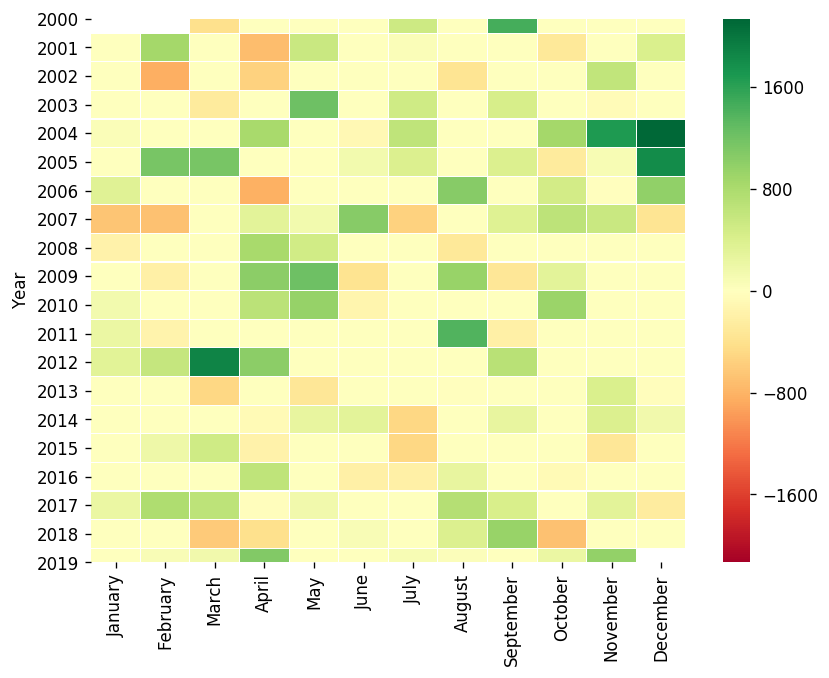

In [56]:
def plot_equity_heatmap(operations,annotations):
    monthly = operations.resample('M').sum()
    toHeatMap = pd.DataFrame(monthly)
    toHeatMap["Year"] = toHeatMap.index.year
    toHeatMap["Month"] = toHeatMap.index.month
    Show = toHeatMap.groupby(by=['Year','Month']).sum().unstack()
    Show.columns = ["January","February","March","April","May","June",
                    "July","August","September","October","November","December"]
    plt.figure(figsize=(8,6),dpi=120)
    sns.heatmap(Show, cmap="RdYlGn", linecolor="white", linewidth=0.1, annot=annotations, 
                vmin=-max(monthly.min(),monthly.max()), vmax=monthly.max())
    return

plot_equity_heatmap(operations,False)

Performance Report - by Gandalf Project R&D

Profit:                   34583.66
Operations:               153
Average Trade:            226.04

Profit Factor:            2.64
Gross Profit:             55675.93
Gross Loss:               -21092.27

Percent Winning Trades:   56.86
Percent Losing Trades:    43.14
Reward Risk Ratio:        2.0

Max Gain:                 2133.93  in date  2004-12-01 00:00:00
Average Gain:             639.95
Max Loss:                 -1020.26  in date  2007-11-08 00:00:00
Average Loss:             -319.58

Avg Open Draw Down:       -747.35
Max Open Draw Down:       -2830.35

Avg Closed Draw Down:     -636.2
Max Closed Draw Down:     -2115.26

Avg Delay Between Peaks:  39.58
Max Delay Between Peaks:  465


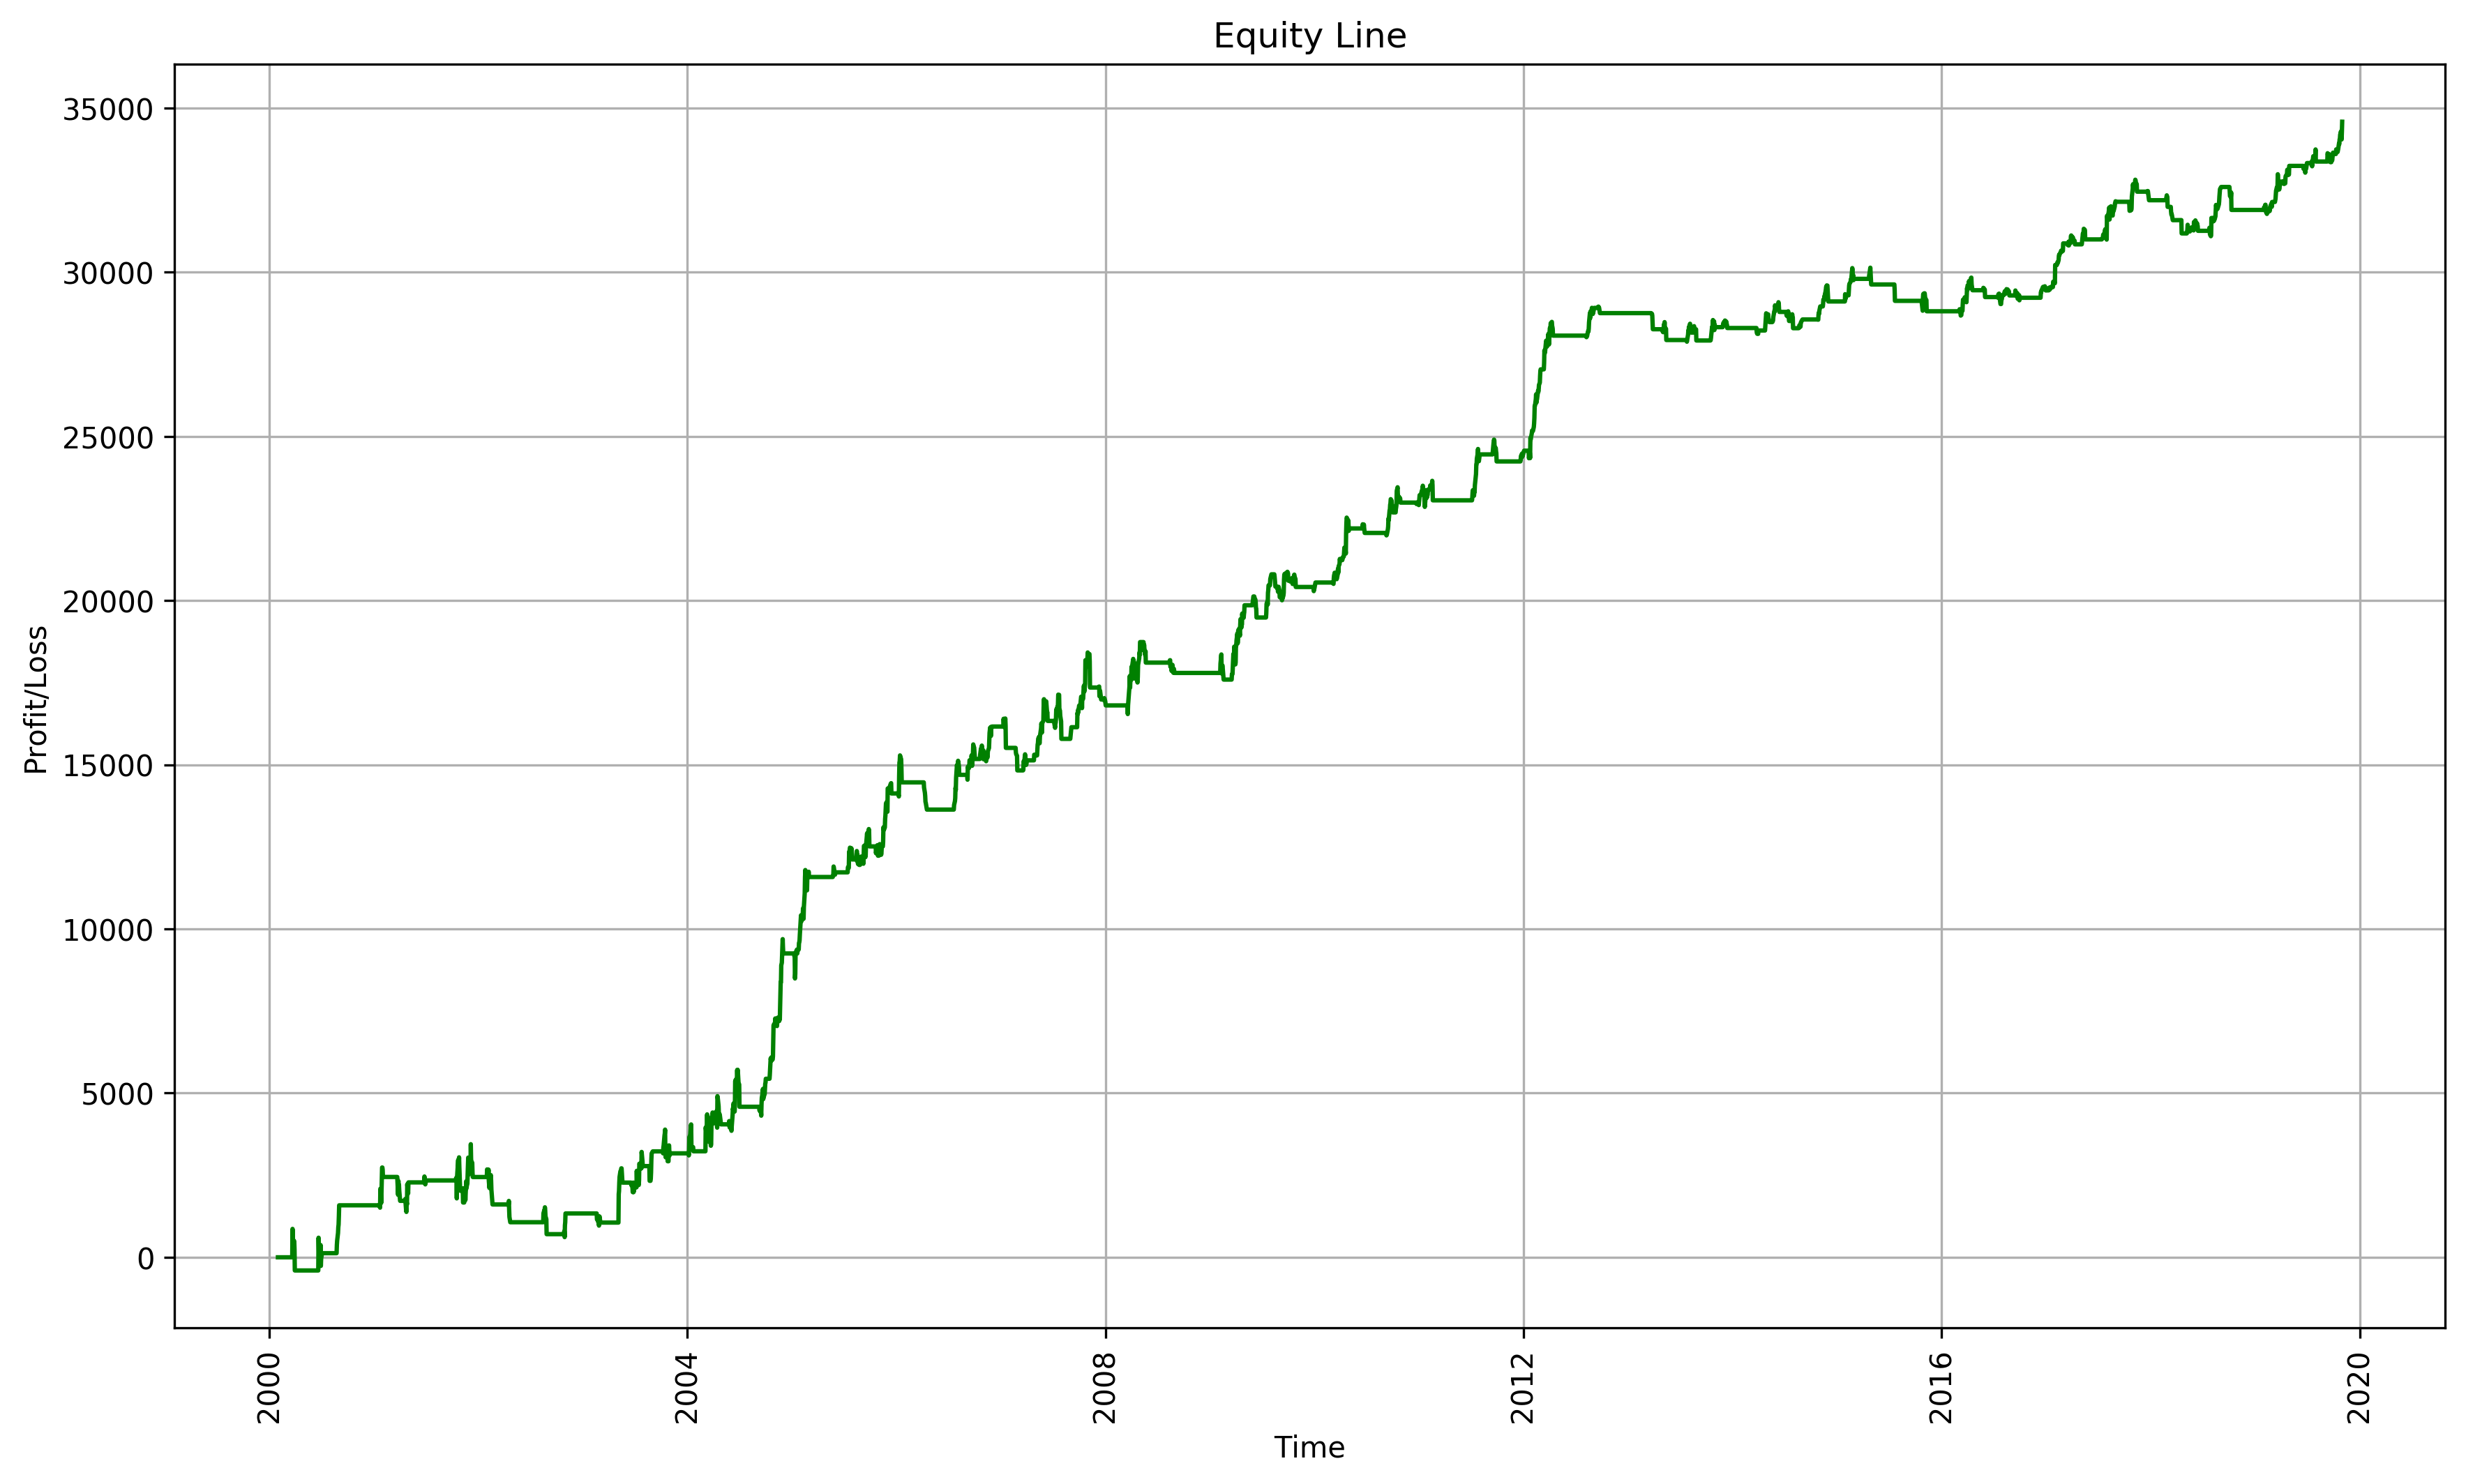

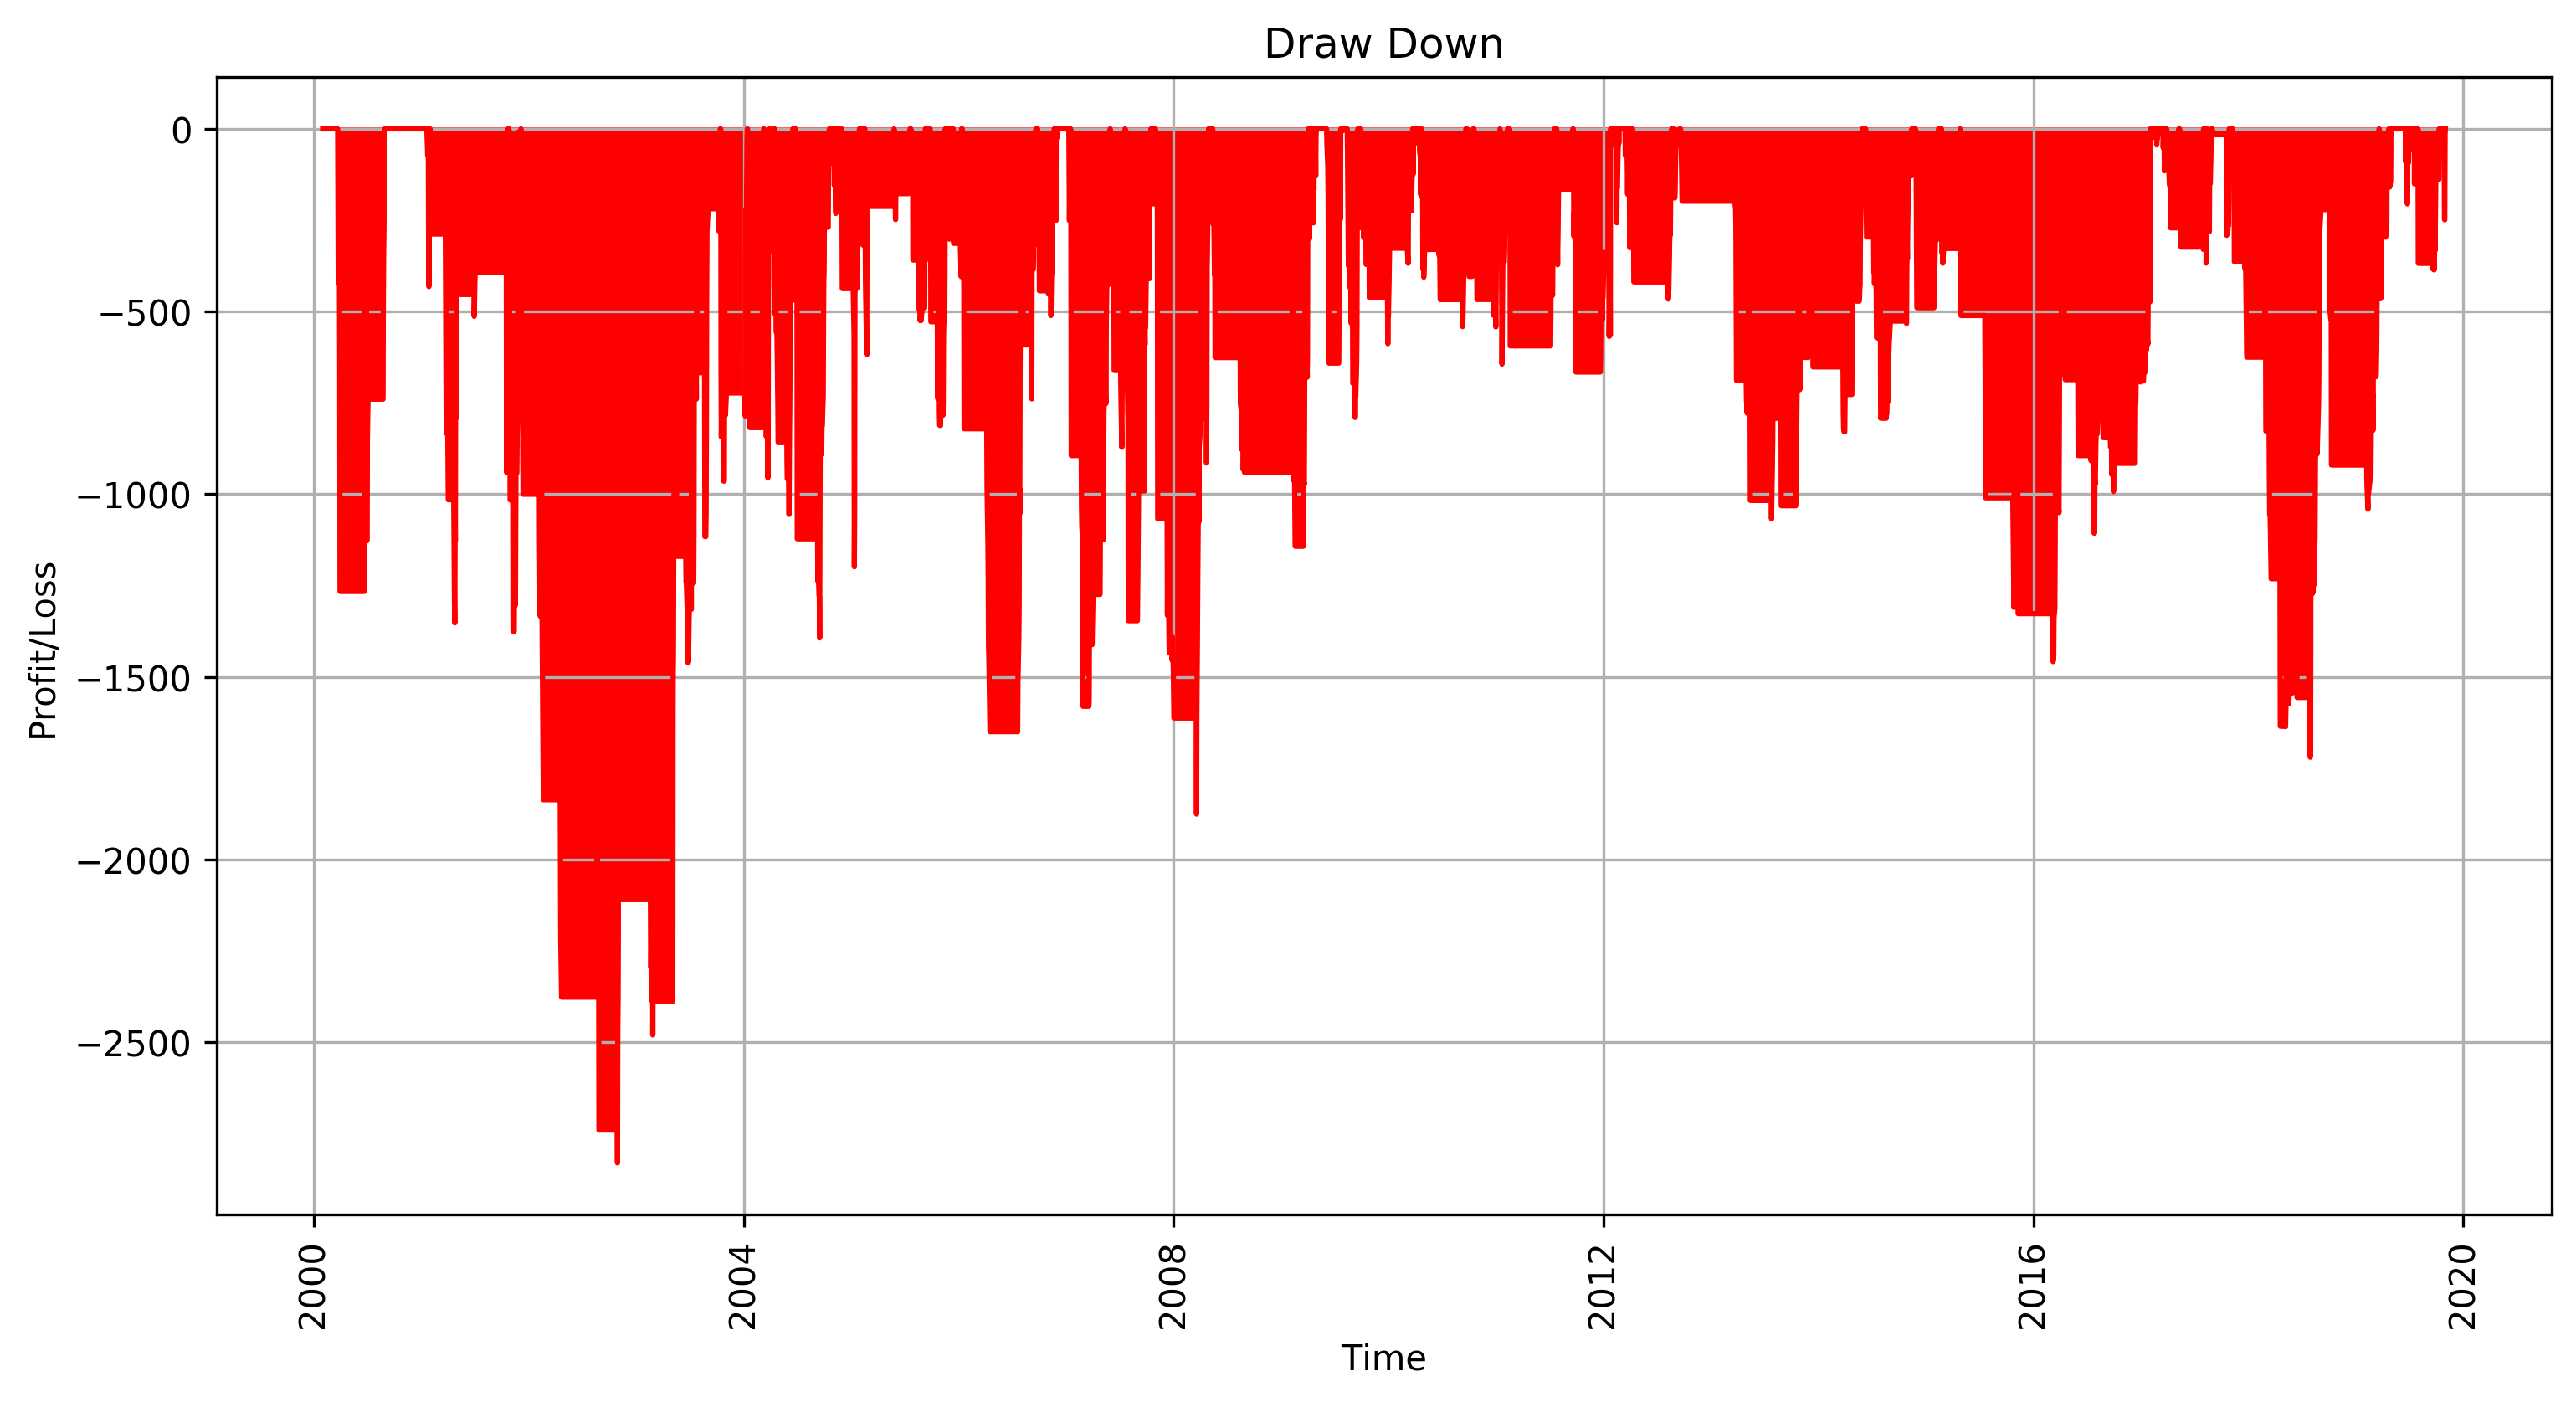

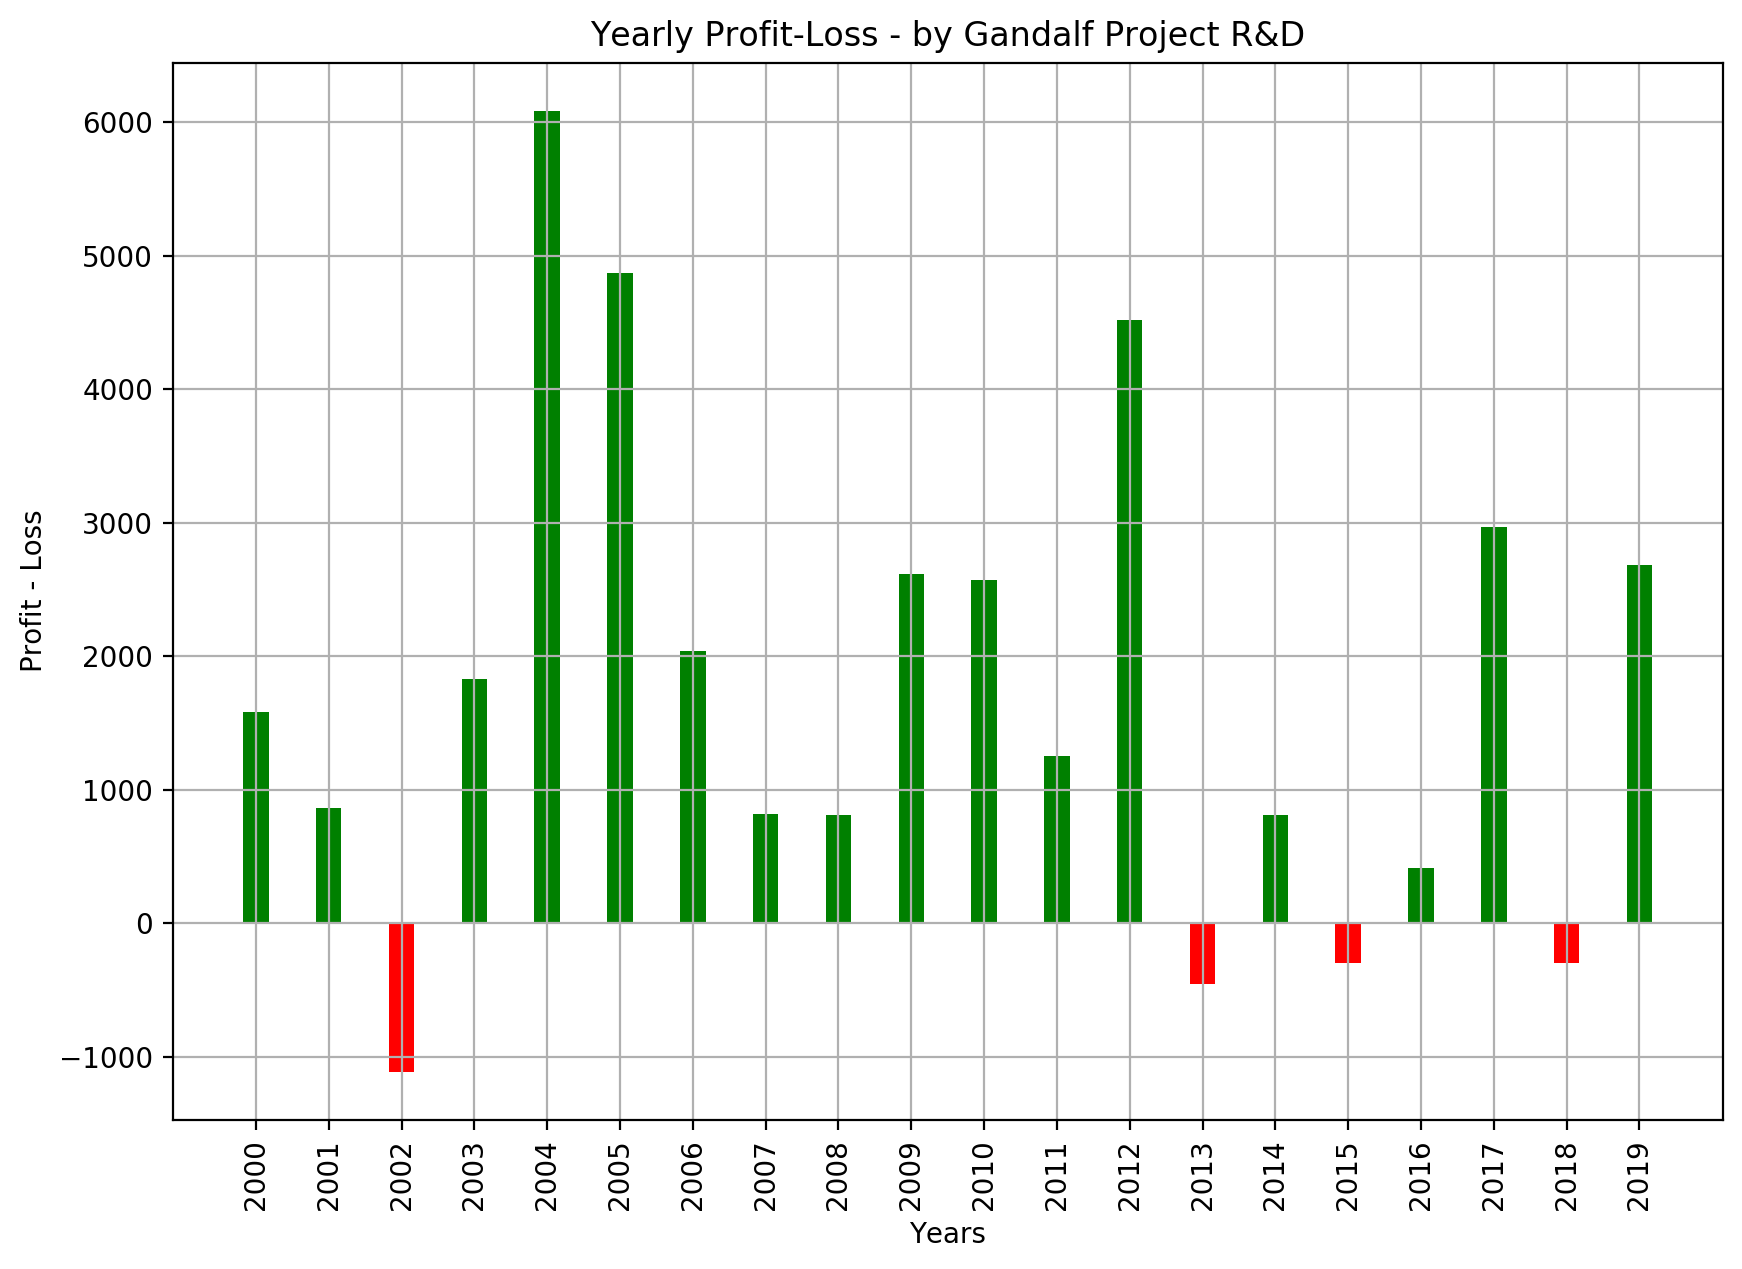

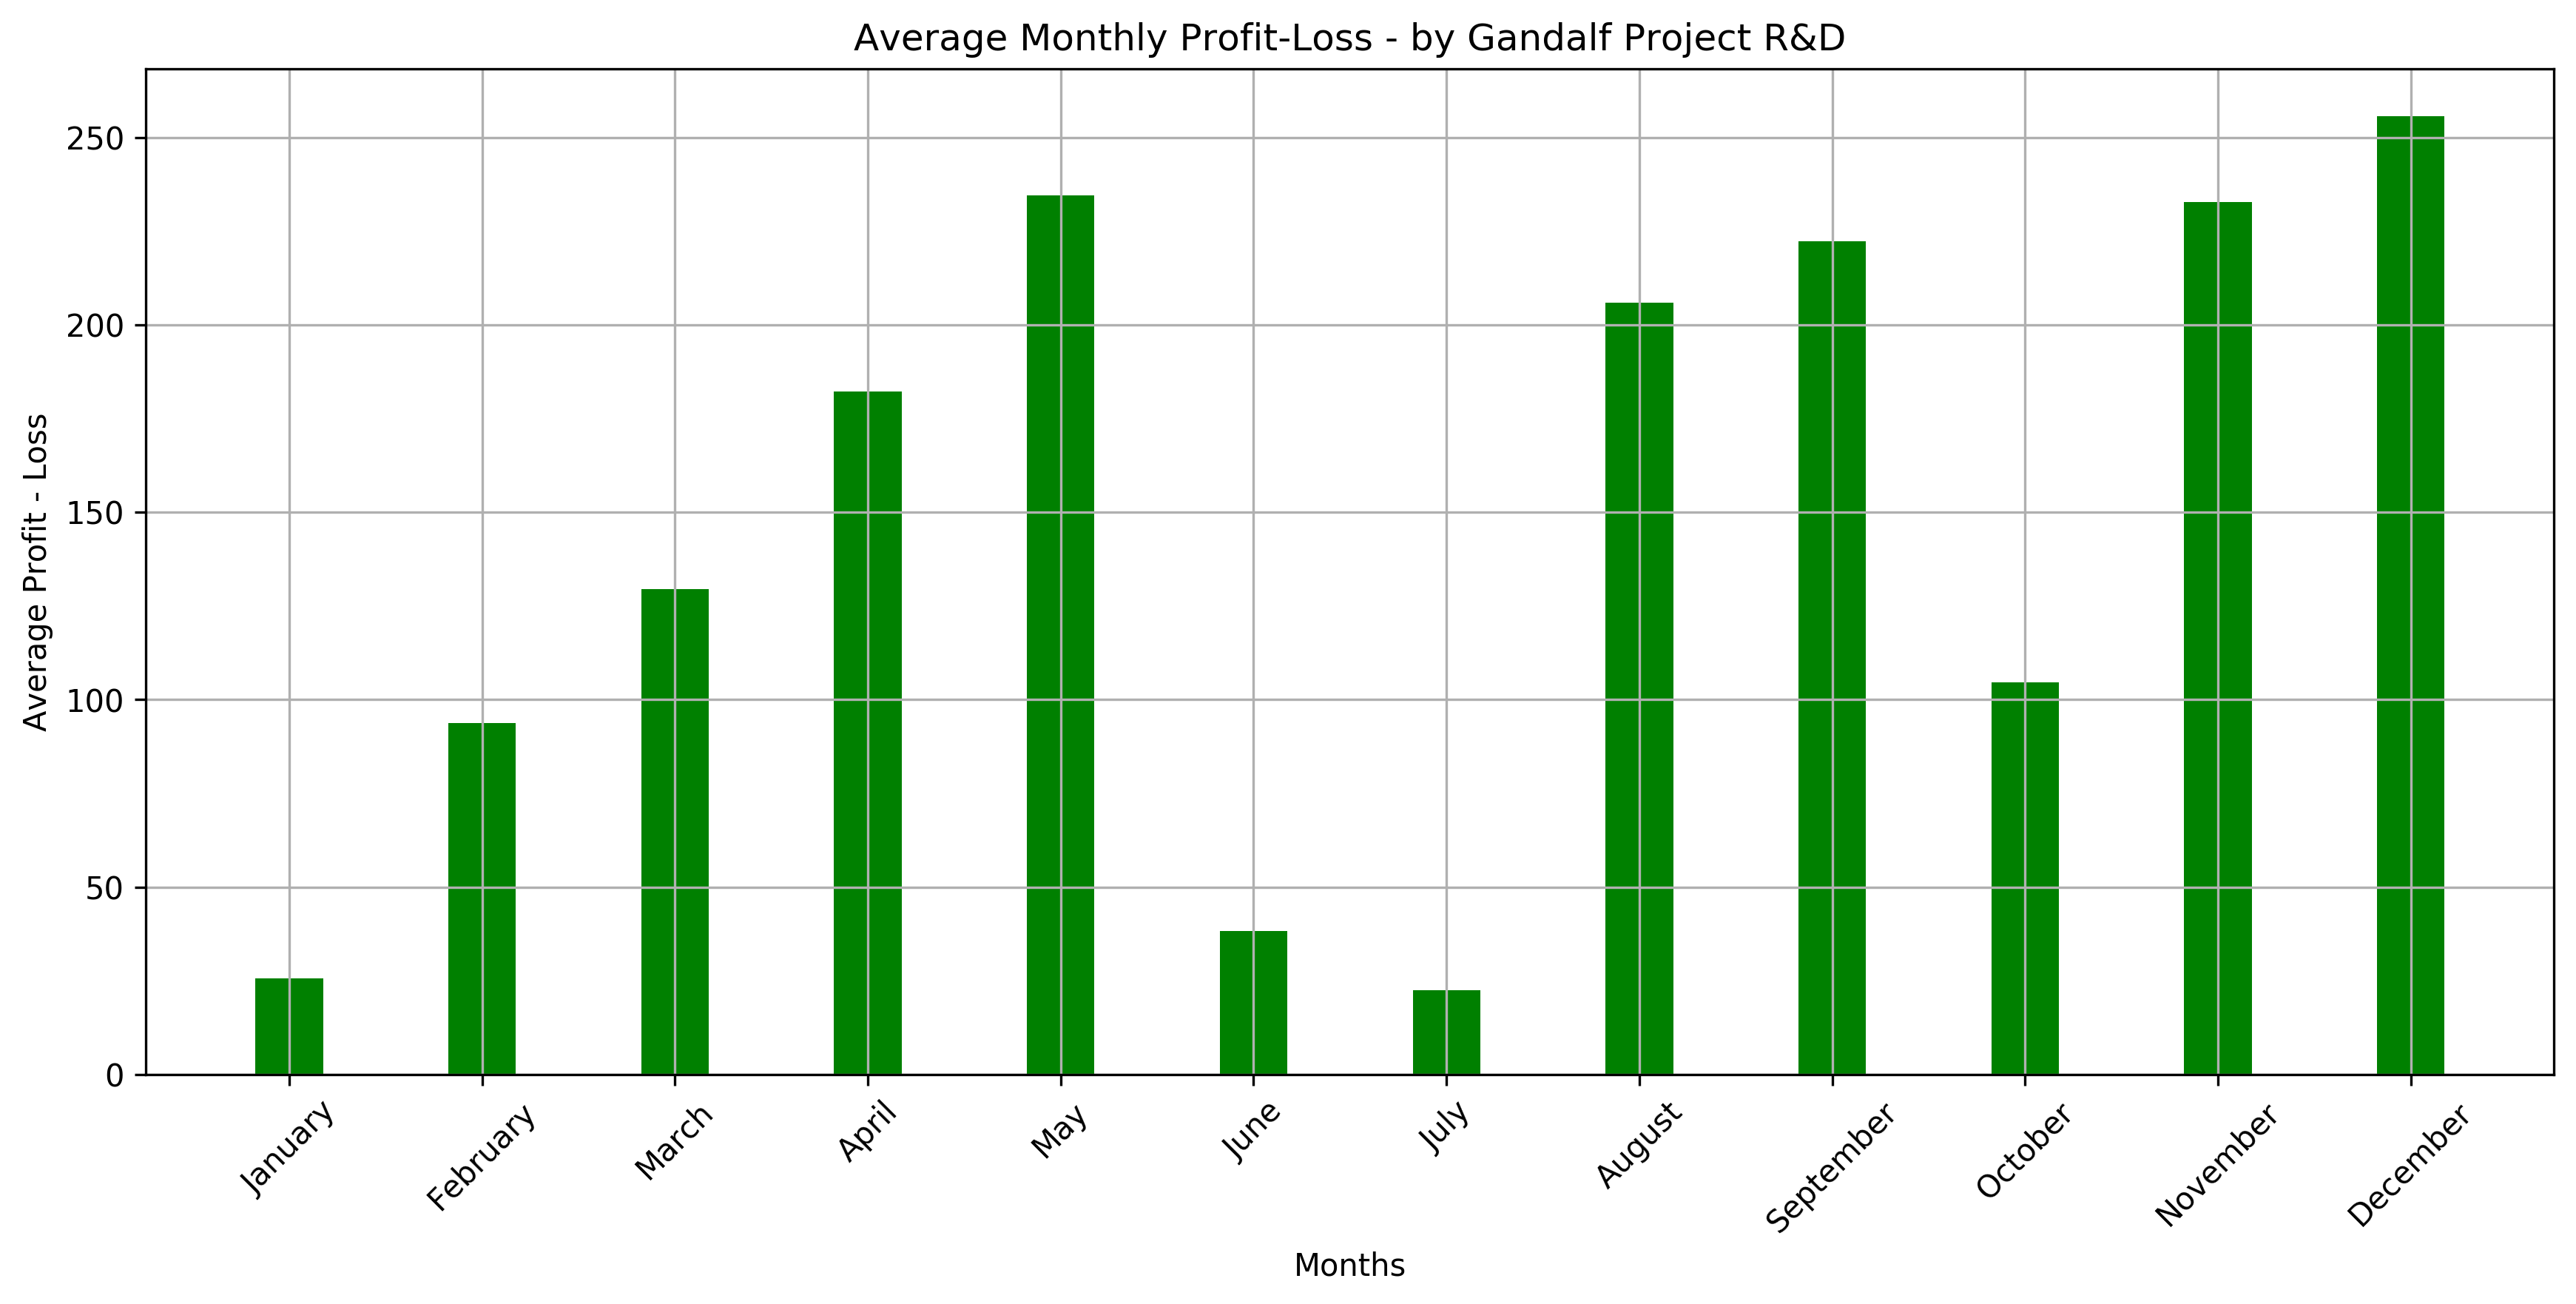

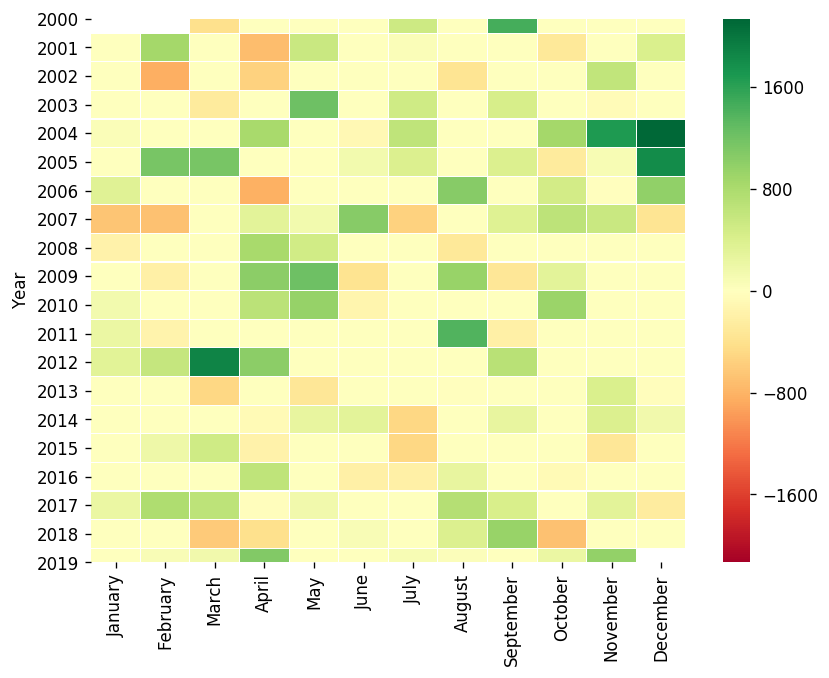

In [59]:
def performance_report(trading_system,operations,closed_equity,open_equity):
    print("Performance Report - by Gandalf Project R&D")
    print("")
    print("Profit:                  ", profit(open_equity))
    print("Operations:              ", operation_number(operations))
    print("Average Trade:           ", avg_trade(operations))
    print("")
    print("Profit Factor:           ", profit_factor(operations))
    print("Gross Profit:            ", gross_profit(operations))
    print("Gross Loss:              ", gross_loss(operations))
    print("")
    print("Percent Winning Trades:  ", percent_win(operations))
    print("Percent Losing Trades:   ", 100 - percent_win(operations))
    print("Reward Risk Ratio:       ", reward_risk_ratio(operations))
    print("")
    print("Max Gain:                ", max_gain(operations), " in date ", max_gain_date(operations))
    print("Average Gain:            ", avg_gain(operations))
    print("Max Loss:                ", max_loss(operations), " in date ", max_loss_date(operations))
    print("Average Loss:            ", avg_loss(operations))
    print("")
    print("Avg Open Draw Down:      ", avgdrawdown_nozero(open_equity))
    print("Max Open Draw Down:      ", max_draw_down(open_equity))
    print("")
    print("Avg Closed Draw Down:    ", avgdrawdown_nozero(trading_system.closed_equity))
    print("Max Closed Draw Down:    ", max_draw_down(trading_system.closed_equity))
    print("")
    print("Avg Delay Between Peaks: ", avg_delay_between_peaks(trading_system.open_equity))
    print("Max Delay Between Peaks: ", max_delay_between_peaks(trading_system.open_equity))
    plot_equity(trading_system.open_equity,"green")
    plot_drawdown(trading_system.open_equity,"red")
    plot_annual_histogram(operations)
    plot_monthly_bias_histogram(operations)
    plot_equity_heatmap(operations,False)
    return

performance_report(trading_system,operations,trading_system.closed_equity,trading_system.open_equity);

In [60]:
operations.tail(10)

date
2018-09-04    944.16
2018-10-10   -699.18
2019-02-01     78.00
2019-03-01    164.14
2019-04-01    621.04
2019-04-30    478.00
2019-07-01     86.50
2019-08-01     46.06
2019-10-01    229.54
2019-11-01    983.41
Name: operations, dtype: float64

In [61]:
operations.resample("A").count()

date
2000-12-31     3
2001-12-31     7
2002-12-31     5
2003-12-31     6
2004-12-31     8
2005-12-31    10
2006-12-31     7
2007-12-31    13
2008-12-31     6
2009-12-31    11
2010-12-31     6
2011-12-31     5
2012-12-31     7
2013-12-31     9
2014-12-31    10
2015-12-31     6
2016-12-31     7
2017-12-31    11
2018-12-31     8
2019-12-31     8
Freq: A-DEC, Name: operations, dtype: int64

In [62]:
operations.resample("A").count().mean()

7.65

# Funzioni utilizzate:

In [65]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_rows = 99999


def load_data(filename):
    """
    Funzione per il parsing di una serie intraday 
    con estensione txt esportata da Tradestation
    """
    data = pd.read_csv(filename, 
                       usecols=['Date','Time','Open','High','Low','Close','Up','Down'], 
                       parse_dates=[['Date', 'Time']], )
    data.columns = ["date_time","open","high","low","close","up","down"]
    data.set_index('date_time', inplace = True)
    data['volume'] = data['up'] + data['down']
    data.drop(['up','down'],axis=1,inplace=True)
    data["dayofweek"] = data.index.dayofweek
    data["day"] = data.index.day
    data["month"] = data.index.month
    data["year"] = data.index.year
    data["dayofyear"] = data.index.dayofyear
    data["quarter"] = data.index.quarter
    data["hour"] = data.index.hour
    data["minute"] = data.index.minute
    return data

def load_data_daily(filename):
    """
    Funzione per il caricamento di uno storico daily
    Fonte dati: Tradestation .txt
    """
    data = pd.read_csv(filename, parse_dates = ["Date","Time"])
    data.columns = ["date","time","open","high","low","close","volume","oi"]
    data.set_index("date", inplace = True)
    data.drop(["time","oi"], axis=1, inplace=True)
    data["dayofweek"] = data.index.dayofweek
    data["day"] = data.index.day
    data["month"] = data.index.month
    data["year"] = data.index.year
    data["dayofyear"] = data.index.dayofyear
    data["quarter"] = data.index.quarter
    return data
    
def crossover(array1, array2):
    return (array1 > array2) & (array1.shift(1) < array2.shift(1))

def crossunder(array1, array2):
    return (array1 < array2) & (array1.shift(1) > array2.shift(1))
    
def marketposition_generator(enter_rules,exit_rules):
    """
    Funzione per calcolare il marketposition date due serie di enter_rules and exit_rules
    """
    service_dataframe = pd.DataFrame(index = enter_rules.index)
    service_dataframe['enter_rules'] = enter_rules
    service_dataframe['exit_rules'] = exit_rules
    
    status = 0
    mp = []
    for (i, j) in zip(enter_rules, exit_rules):
        if status == 0:
            if i == 1 and j != -1:
                status = 1
        else:
            if j == -1:
                status = 0
        mp.append(status)
        
    service_dataframe['mp_new'] = mp
    service_dataframe.mp_new = service_dataframe.mp_new.shift(1)
    service_dataframe.mp_new.fillna(0)
    service_dataframe.to_csv("marketposition_generator.csv")
    return service_dataframe.mp_new
    
def apply_trading_system(imported_dataframe, direction, order_type, enter_level, enter_rules, exit_rules):
    dataframe = imported_dataframe.copy()
    dataframe['enter_rules'] = enter_rules.apply(lambda x: 1 if x == True else 0)
    dataframe['exit_rules'] = exit_rules.apply(lambda x: -1 if x == True else 0)
    dataframe["mp"] = marketposition_generator(dataframe.enter_rules,dataframe.exit_rules)
    
    if ORDER_TYPE == "market":
        dataframe["entry_price"] = np.where((dataframe.mp.shift(1) == 0) & 
                                            (dataframe.mp == 1), dataframe.open, np.nan)
        if INSTRUMENT == 1:
            dataframe["number_of_stocks"] = np.where((dataframe.mp.shift(1) == 0) & 
                                            (dataframe.mp == 1), OPERATION_MONEY / dataframe.open, np.nan)
    dataframe["entry_price"] = dataframe["entry_price"].fillna(method='ffill')
    if INSTRUMENT == 1:
        dataframe["number_of_stocks"] = dataframe["number_of_stocks"]\
                                        .apply(lambda x: round(x,0)).fillna(method='ffill')
    dataframe["events_in"] = np.where((dataframe.mp == 1) & (dataframe.mp.shift(1) == 0), "entry", "")

    if direction == "long":
        if INSTRUMENT == 1:
            dataframe["open_operations"] = (dataframe.close - dataframe.entry_price) * dataframe.number_of_stocks
            dataframe["open_operations"] = np.where((dataframe.mp == 1) & (dataframe.mp.shift(-1) == 0), 
                    (dataframe.open.shift(-1) - dataframe.entry_price) * dataframe.number_of_stocks - 2 * COSTS,
                     dataframe.open_operations)
    else:
        if INSTRUMENT == 1:
            dataframe["open_operations"] = (dataframe.entry_price - dataframe.close) * dataframe.number_of_stocks
            dataframe["open_operations"] = np.where((dataframe.mp == 1) & (dataframe.mp.shift(-1) == 0), 
                    (dataframe.entry_price - dataframe.open.shift(-1)) * dataframe.number_of_stocks - 2 * COSTS,
                     dataframe.open_operations)
        
    dataframe["open_operations"] = np.where(dataframe.mp == 1, dataframe.open_operations, 0)
    dataframe["events_out"] = np.where((dataframe.mp == 1) & (dataframe.exit_rules == -1), "exit", "")      
    dataframe["operations"] = np.where((dataframe.exit_rules == -1) & 
                                       (dataframe.mp == 1), dataframe.open_operations, np.nan)
    dataframe["closed_equity"] = dataframe.operations.fillna(0).cumsum()
    dataframe["open_equity"] = dataframe.closed_equity + \
                               dataframe.open_operations - dataframe.operations.fillna(0)
    dataframe.to_csv("trading_system_export.csv")
    return dataframe
    
def plot_equity(equity,color):
    """
    Funzione per stampare un'equity line
    """
    plt.figure(figsize=(14, 8), dpi=300)
    plt.plot(equity, color=color)
    plt.xlabel("Time")
    plt.ylabel("Profit/Loss")
    plt.title('Equity Line')
    plt.xticks(rotation='vertical')
    plt.grid(True)
    plt.show()
    return
    
def drawdown(equity):
    """
    Funzione che calcola il draw down data un'equity line
    """
    maxvalue = equity.expanding(0).max()
    drawdown = equity - maxvalue
    drawdown_series = pd.Series(drawdown, index = equity.index)
    return drawdown_series

def plot_drawdown(equity,color):
    """
    Funzione per graficare la curva di draw down
    """
    dd = drawdown(equity)
    plt.figure(figsize = (12, 6), dpi = 300)
    plt.plot(dd, color = color)
    plt.fill_between(dd.index, 0, dd, color = color)
    plt.xlabel("Time")
    plt.ylabel("Profit/Loss")
    plt.title('Draw Down')
    plt.xticks(rotation='vertical')
    plt.grid(True)
    plt.show()
    return
    
def plot_double_equity(closed_equity,open_equity):
    """
    Funzione per stampare due equity sovrapposte
    """
    plt.figure(figsize=(14, 8), dpi=300)
    plt.plot(open_equity, color='red')
    plt.plot(closed_equity, color='green')
    plt.xlabel("Time")
    plt.ylabel("Profit/Loss")
    plt.title('Open & Closed Equity Line')
    plt.xticks(rotation='vertical')
    plt.grid(True)
    plt.show()
    return
    
def profit(equity):
    return round(equity[-1],2)
    
def operation_number(operations):
    return operations.count()
    
def avg_trade(operations):
    return round(operations.mean(),2)
    
def max_draw_down(equity):
    dd = drawdown(equity)
    return round(dd.min(),2)
    
def avgdrawdown_nozero(equity):
    """
    calcola la media del draw down storico
    non considerando i valori nulli (nuovi massimi di equity line)
    """
    dd = drawdown(equity)
    return round(dd[dd < 0].mean(),2)

def avg_loss(operations):
    return round(operations[operations < 0].mean(),2)
    
def max_loss(operations):
    return round(operations.min(),2)
    
def max_loss_date(operations):
    return operations.idxmin()
    
def avg_gain(operations):
    return round(operations[operations > 0].mean(),2)
    
def max_gain(operations):
    return round(operations.max(),2)
    
def max_gain_date(operations):
    return operations.idxmax()
    
def gross_profit(operations):
    return round(operations[operations > 0].sum(),2)
    
def gross_loss(operations):
    return round(operations[operations <= 0].sum(),2)
    
def profit_factor(operations):
    a = gross_profit(operations)
    b = gross_loss(operations)
    if b != 0:
        return round(abs(a / b), 2)
    else:
        return round(abs(a / 0.00000001), 2)
        
def percent_win(operations):
    return round((operations[operations > 0].count() / operations.count() * 100),2)
    
def reward_risk_ratio(operations):
    if operations[operations <= 0].mean() != 0:
        return round((operations[operations > 0].mean() / -operations[operations <= 0].mean()),2)
    else:
        return np.inf
        
def delay_between_peaks(equity):
    """
    Funzione per calcolare i ritardi istantanei in barre
    nel conseguire nuovi massimi di equity line
    Input: equity line
    """
    work_df = pd.DataFrame(equity, index = equity.index)
    work_df["drawdown"] = drawdown(equity)
    work_df["delay_elements"] = work_df["drawdown"].apply(lambda x: 1 if x < 0 else 0)
    work_df["resets"] = np.where(work_df["drawdown"] == 0, 1, 0)
    work_df['cumsum'] = work_df['resets'].cumsum()
    #print(work_df.iloc[-20:,:])
    a = pd.Series(work_df['delay_elements'].groupby(work_df['cumsum']).cumsum())
    return a

def max_delay_between_peaks(equity):
    """
    Funzione per calcolare il più lungo ritardo in barre dall'ultimo massimo
    Input: equity line
    """
    a = delay_between_peaks(equity)
    return a.max()
    
def avg_delay_between_peaks(equity):
    """
    Funzione per calcolare il ritardo medio in barre
    nel conseguire nuovi massimi di equity line
    Input: equity line
    """
    work_df = pd.DataFrame(equity, index = equity.index)
    work_df["drawdown"] = drawdown(equity)
    work_df["delay_elements"] = work_df["drawdown"].apply(lambda x: 1 if x < 0 else np.nan)
    work_df["resets"] = np.where(work_df["drawdown"] == 0, 1, 0)
    work_df['cumsum'] = work_df['resets'].cumsum()
    work_df.dropna(inplace = True)
    a = work_df['delay_elements'].groupby(work_df['cumsum']).sum()
    return round(a.mean(),2)
    
def plot_annual_histogram(operations):
    yearly = operations.resample('A').sum()
    colors = pd.Series()
    colors = yearly.apply(lambda x: "green" if x > 0 else "red")
    n_groups = len(yearly)
    plt.subplots(figsize=(10, 7), dpi=200)
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1

    rects1 = plt.bar(index,
                     yearly,
                     bar_width,
                     alpha=opacity,
                     color=colors,
                     label='Yearly Statistics')

    plt.xlabel('Years')
    plt.ylabel('Profit - Loss')
    plt.title('Yearly Profit-Loss - by Gandalf Project R&D')
    plt.xticks(index, yearly.index.year, rotation=90)
    plt.grid(True)
    plt.show()
    return
    
def plot_monthly_bias_histogram(operations):
    monthly = pd.DataFrame(operations.fillna(0)).resample('M').sum()
    monthly['Month'] = monthly.index.month
    biasMonthly = []
    months = []

    for month in range(1, 13):
        months.append(month)
    for month in months:
        biasMonthly.append(monthly[(monthly['Month'] == month)].mean())

    biasMonthly = pd.DataFrame(biasMonthly)
    column = biasMonthly.columns[0]
    colors = pd.Series()
    colors = biasMonthly[column].apply(lambda x: "green" if x > 0 else "red")
    n_groups = len(biasMonthly)
    plt.subplots(figsize=(14, 6), dpi=300)
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 1

    rects1 = plt.bar(index,
                     biasMonthly[column],
                     bar_width,
                     alpha=opacity,
                     color=colors,
                     label='Yearly Statistics')

    plt.xlabel('Months')
    plt.ylabel('Average Profit - Loss')
    plt.title('Average Monthly Profit-Loss - by Gandalf Project R&D')
    months_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September",
                    "October", "November", "December"]
    plt.xticks(index, months_names, rotation=45)
    plt.grid(True)
    plt.show()
    return
    
def plot_equity_heatmap(operations,annotations):
    monthly = operations.resample('M').sum()
    toHeatMap = pd.DataFrame(monthly)
    toHeatMap["Year"] = toHeatMap.index.year
    toHeatMap["Month"] = toHeatMap.index.month
    Show = toHeatMap.groupby(by=['Year','Month']).sum().unstack()
    Show.columns = ["January","February","March","April","May","June",
                    "July","August","September","October","November","December"]
    plt.figure(figsize=(8,6),dpi=120)
    sns.heatmap(Show, cmap="RdYlGn", linecolor="white", linewidth=0.1, annot=annotations, 
                vmin=-max(monthly.min(),monthly.max()), vmax=monthly.max())
    return
    
def performance_report(trading_system,operations,closed_equity,open_equity):
    print("Performance Report - by Gandalf Project R&D")
    print("")
    print("Profit:                  ", profit(open_equity))
    print("Operations:              ", operation_number(operations))
    print("Average Trade:           ", avg_trade(operations))
    print("")
    print("Profit Factor:           ", profit_factor(operations))
    print("Gross Profit:            ", gross_profit(operations))
    print("Gross Loss:              ", gross_loss(operations))
    print("")
    print("Percent Winning Trades:  ", percent_win(operations))
    print("Percent Losing Trades:   ", 100 - percent_win(operations))
    print("Reward Risk Ratio:       ", reward_risk_ratio(operations))
    print("")
    print("Max Gain:                ", max_gain(operations), " in date ", max_gain_date(operations))
    print("Average Gain:            ", avg_gain(operations))
    print("Max Loss:                ", max_loss(operations), " in date ", max_loss_date(operations))
    print("Average Loss:            ", avg_loss(operations))
    print("")
    print("Avg Open Draw Down:      ", avgdrawdown_nozero(open_equity))
    print("Max Open Draw Down:      ", max_draw_down(open_equity))
    print("")
    print("Avg Closed Draw Down:    ", avgdrawdown_nozero(trading_system.closed_equity))
    print("Max Closed Draw Down:    ", max_draw_down(trading_system.closed_equity))
    print("")
    print("Avg Delay Between Peaks: ", avg_delay_between_peaks(trading_system.open_equity))
    print("Max Delay Between Peaks: ", max_delay_between_peaks(trading_system.open_equity))
    plot_equity(trading_system.open_equity,"green")
    plot_drawdown(trading_system.open_equity,"red")
    plot_annual_histogram(operations)
    plot_monthly_bias_histogram(operations)
    plot_equity_heatmap(operations,False)
    return

Performance Report - by Gandalf Project R&D

Profit:                   34984.56
Operations:               152
Average Trade:            230.16

Profit Factor:            2.69
Gross Profit:             55675.93
Gross Loss:               -20691.37

Percent Winning Trades:   57.24
Percent Losing Trades:    42.76
Reward Risk Ratio:        2.01

Max Gain:                 2133.93  in date  2004-12-01 00:00:00
Average Gain:             639.95
Max Loss:                 -1020.26  in date  2007-11-08 00:00:00
Average Loss:             -318.33

Avg Open Draw Down:       -754.61
Max Open Draw Down:       -2830.35

Avg Closed Draw Down:     -640.8
Max Closed Draw Down:     -2115.26

Avg Delay Between Peaks:  38.2
Max Delay Between Peaks:  465


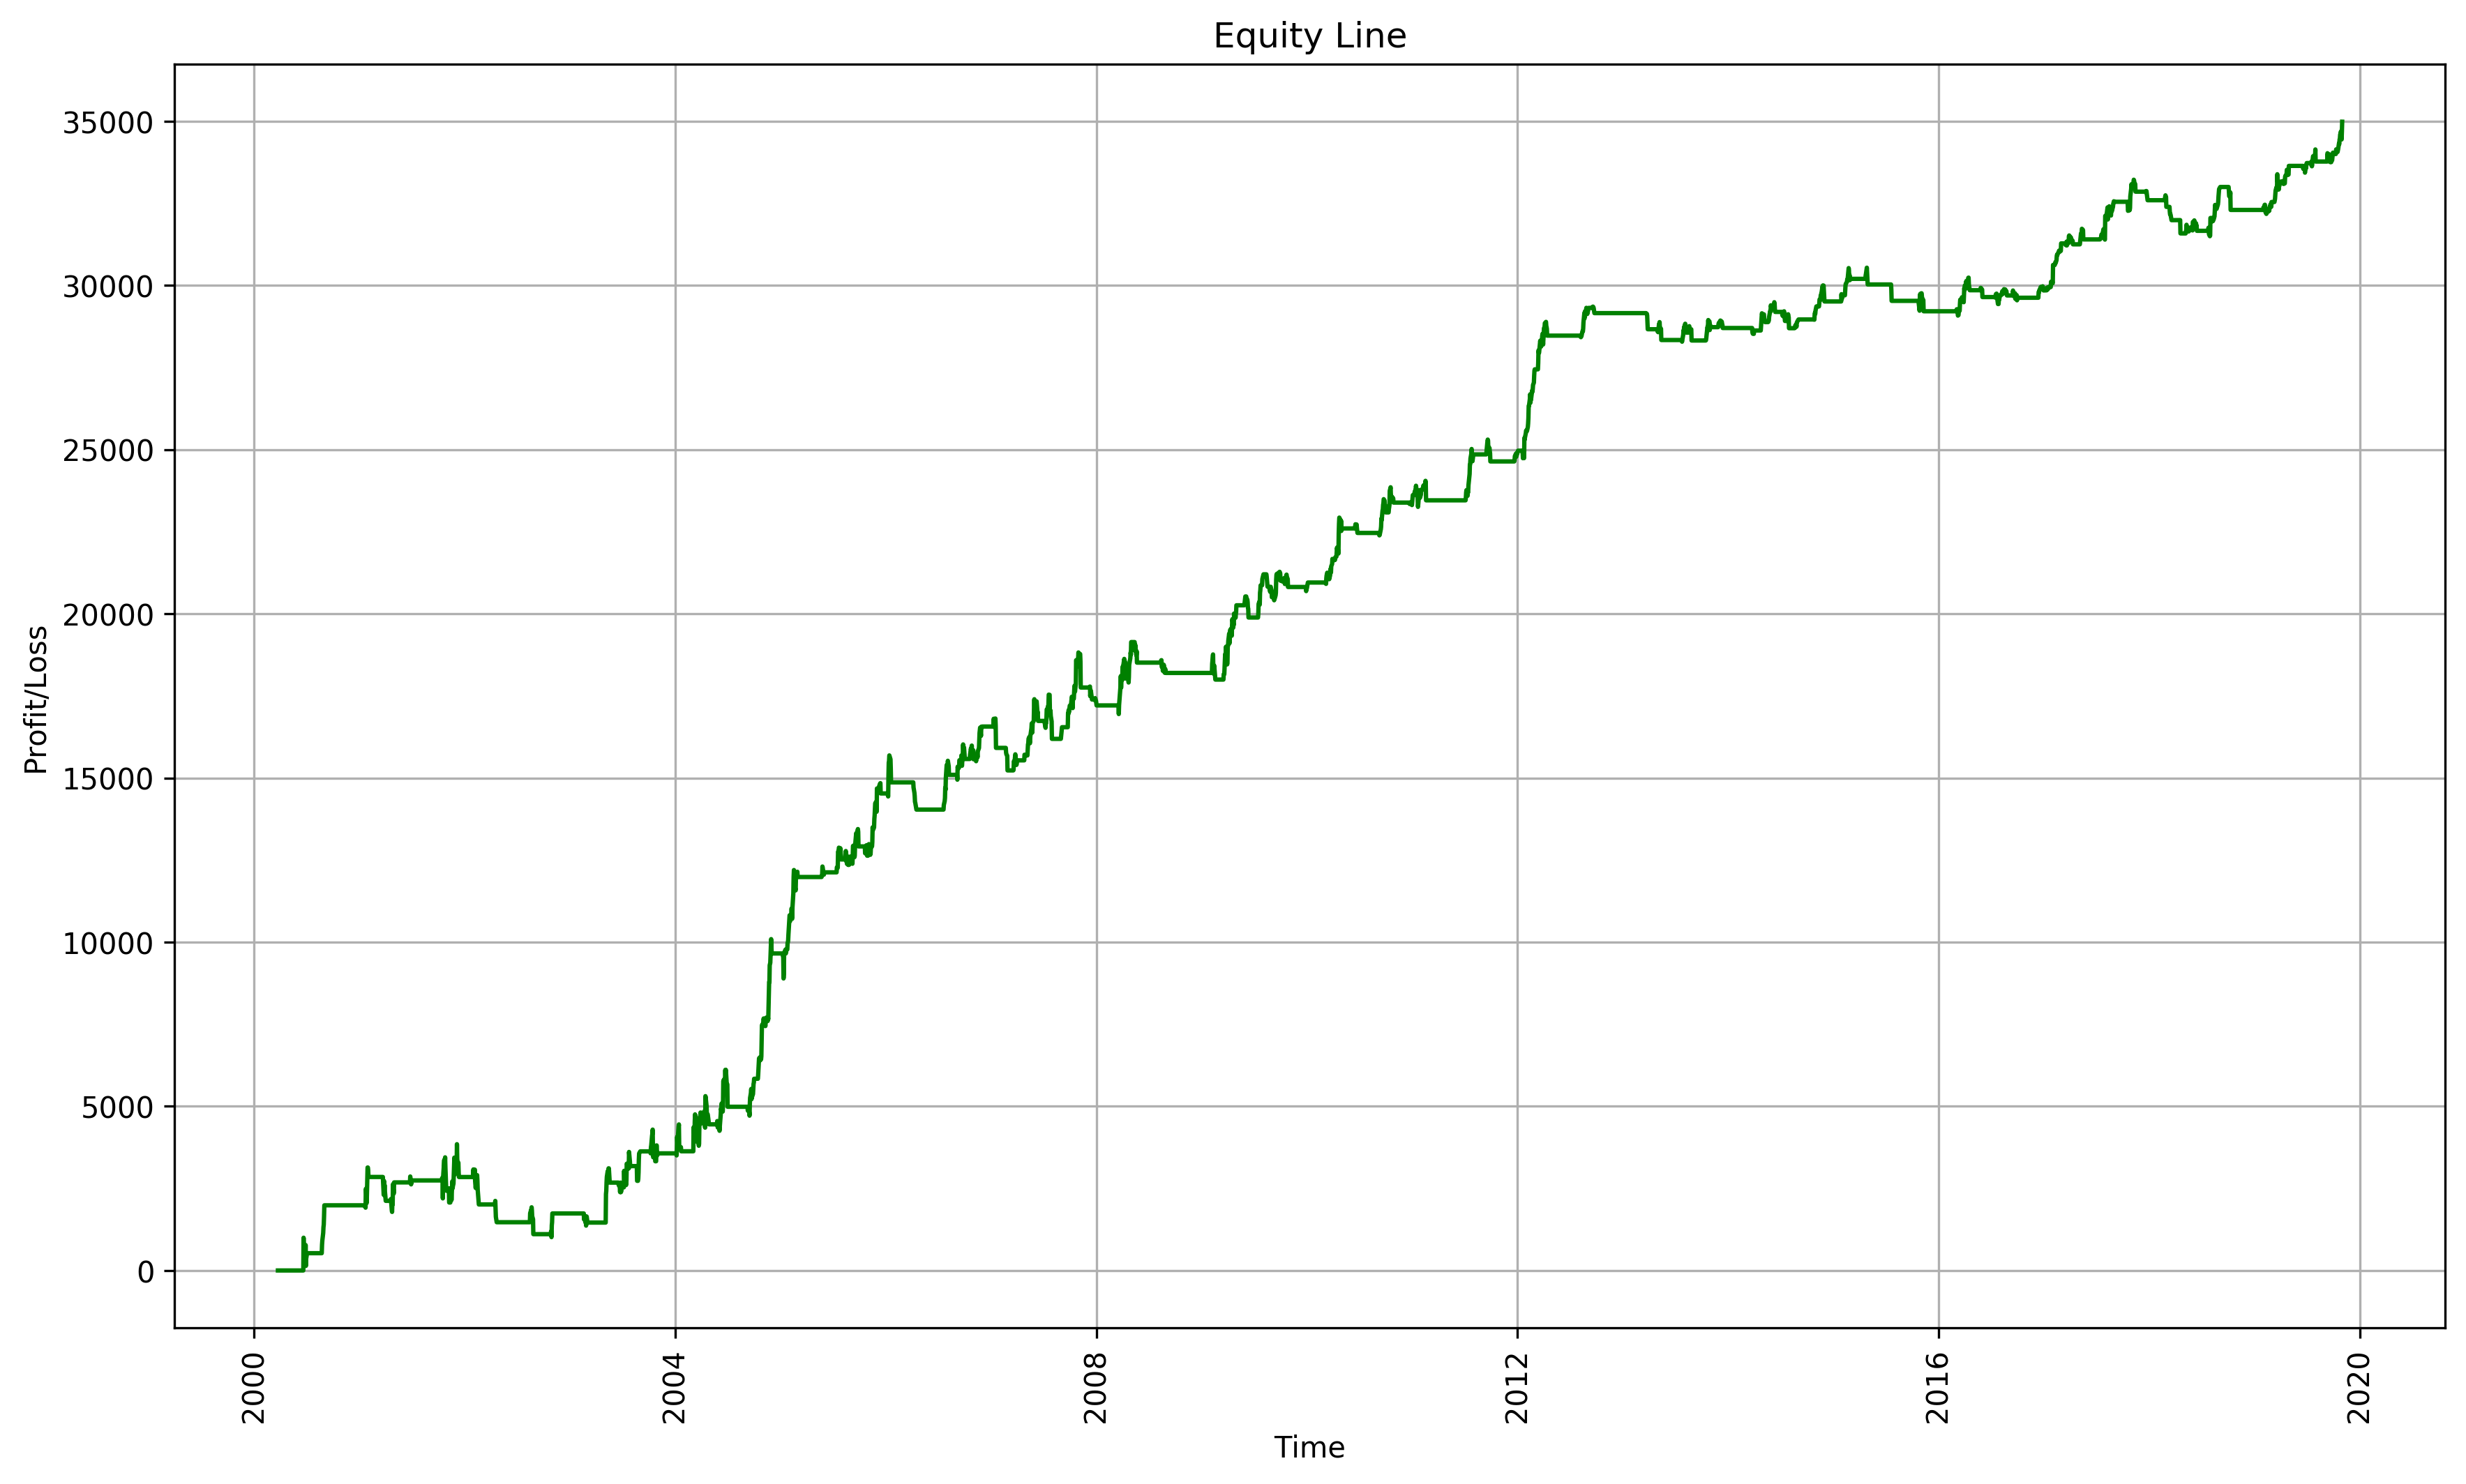

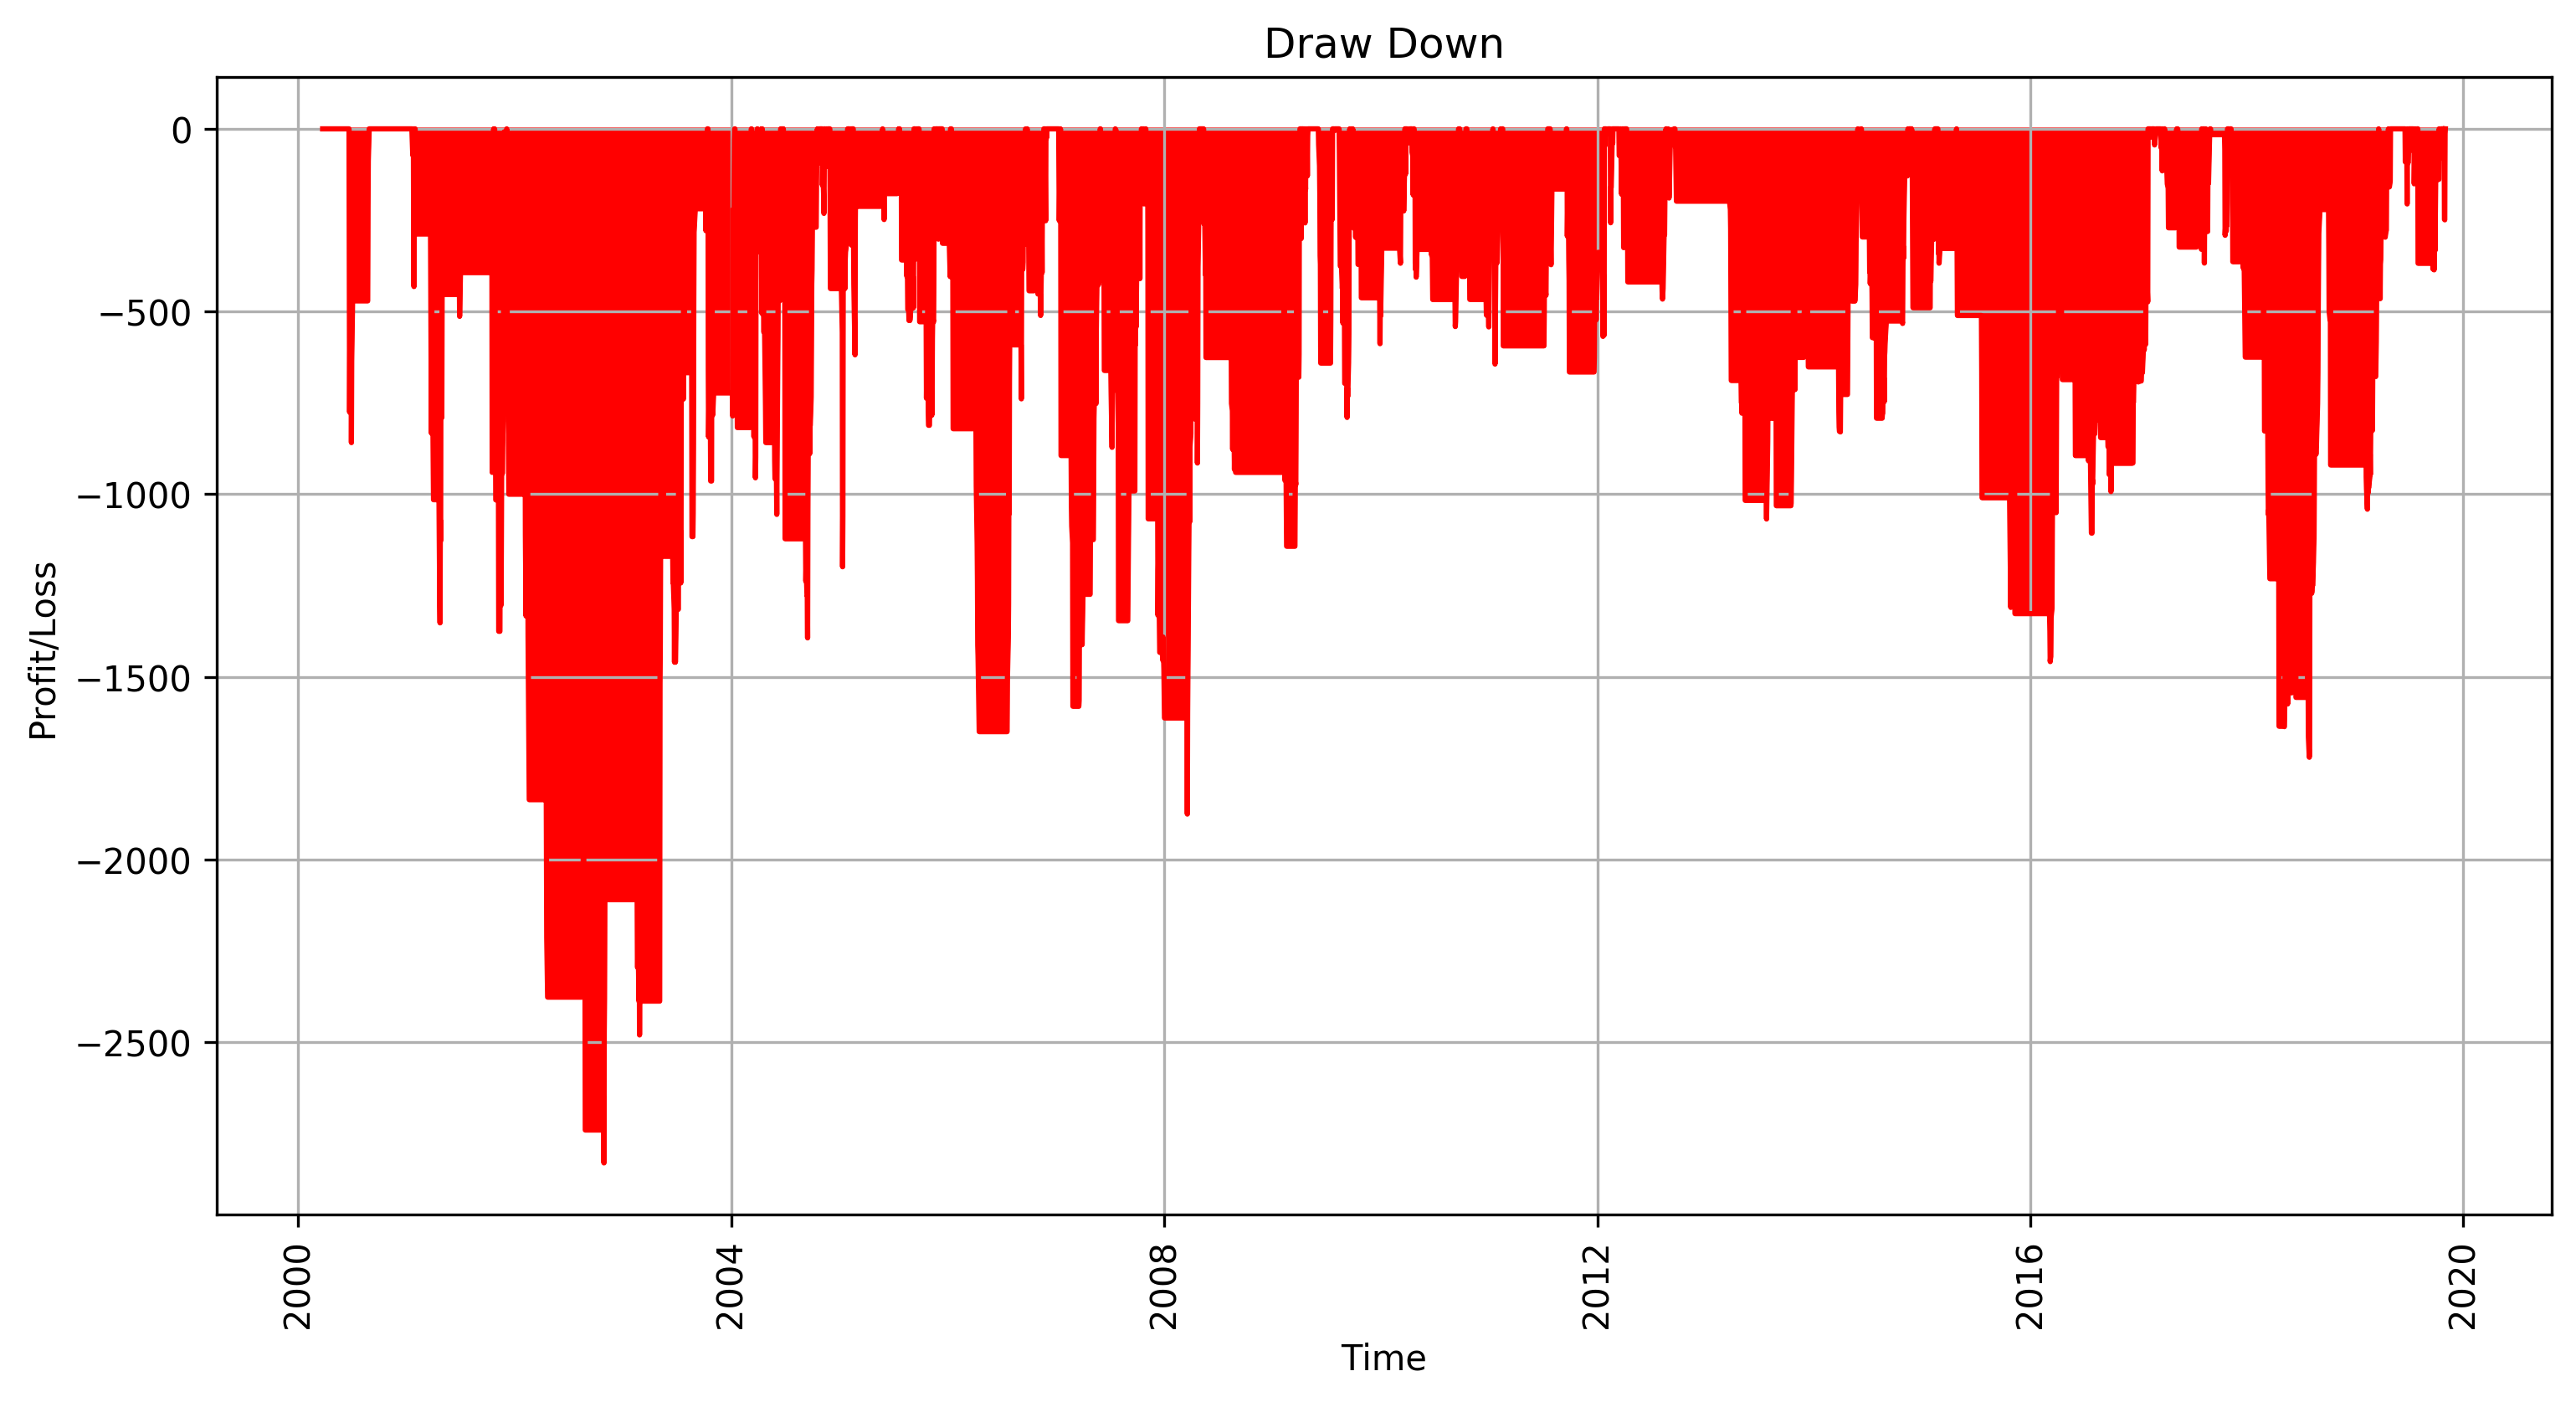

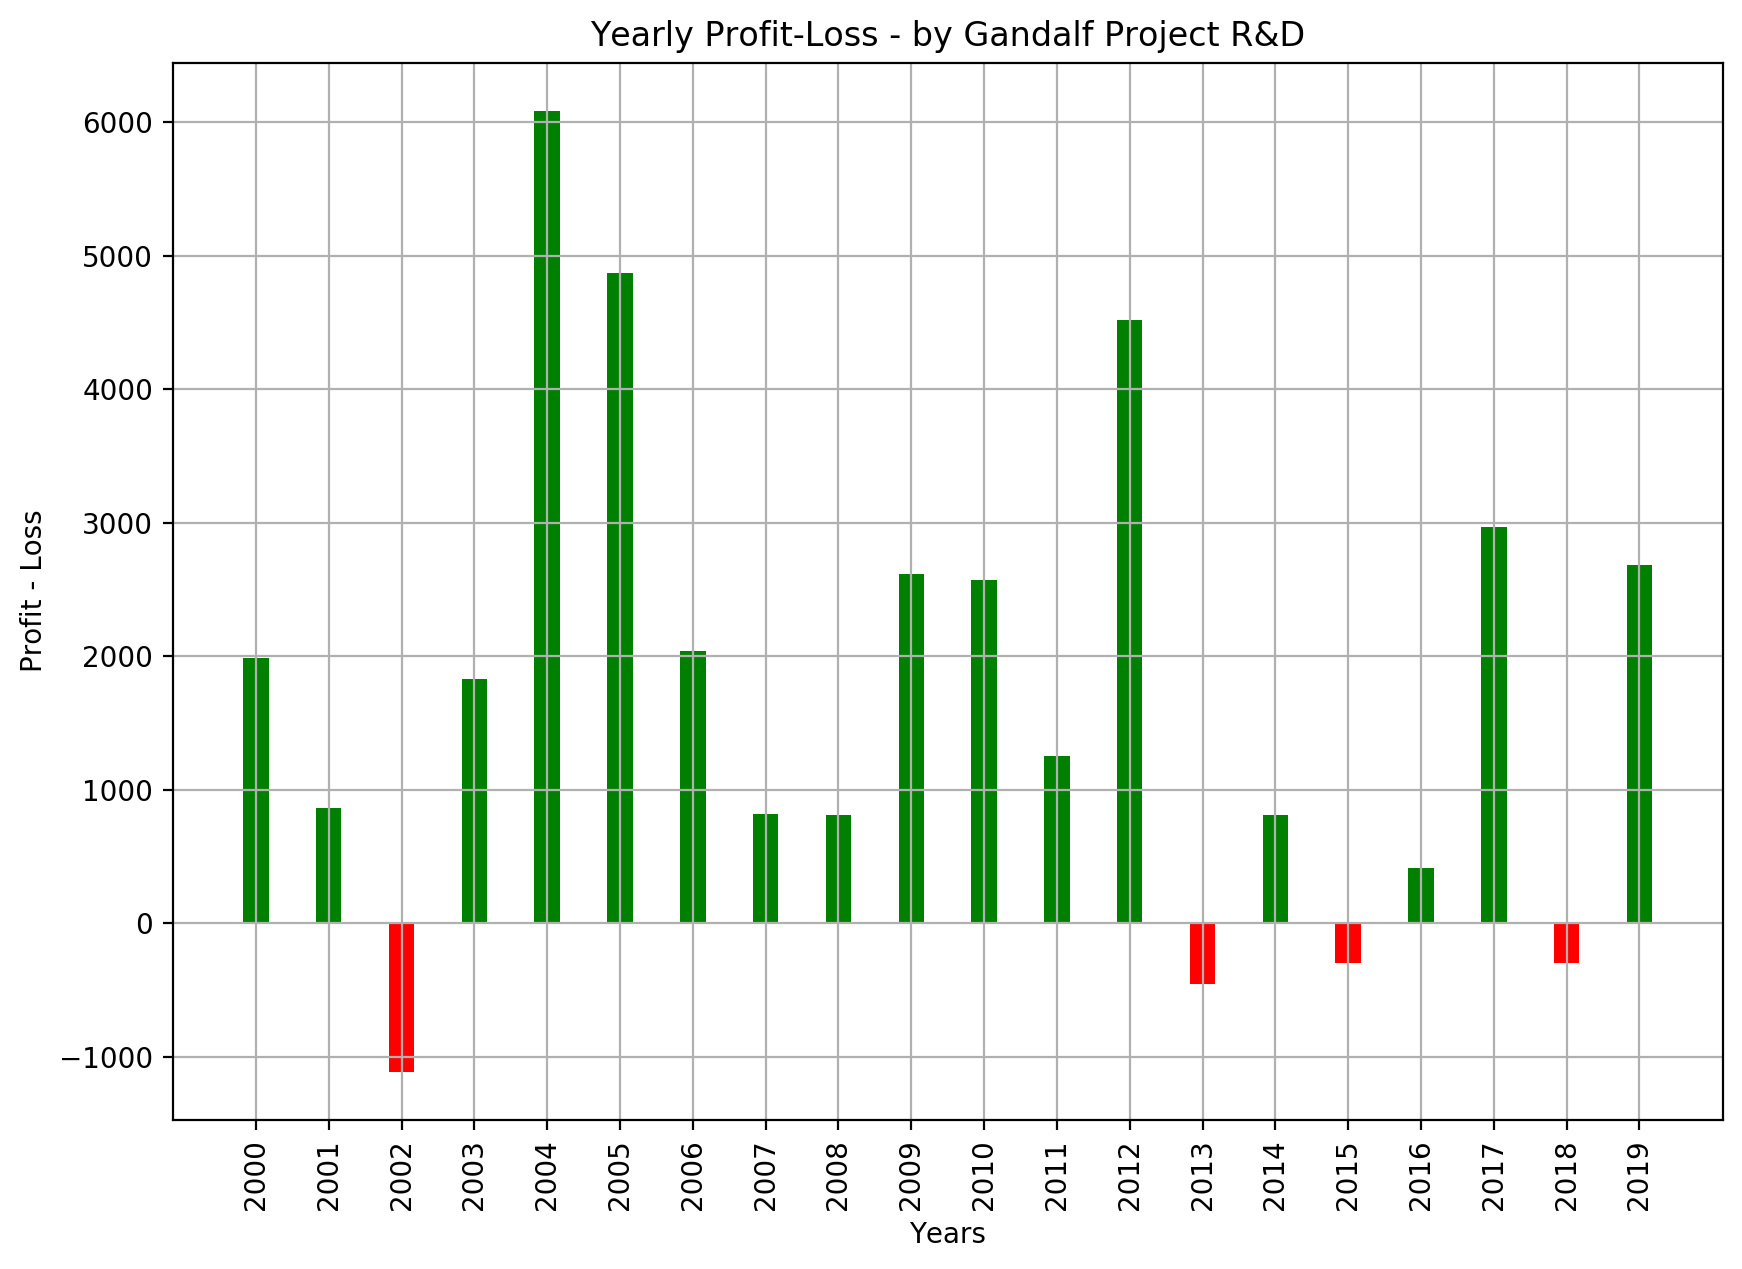

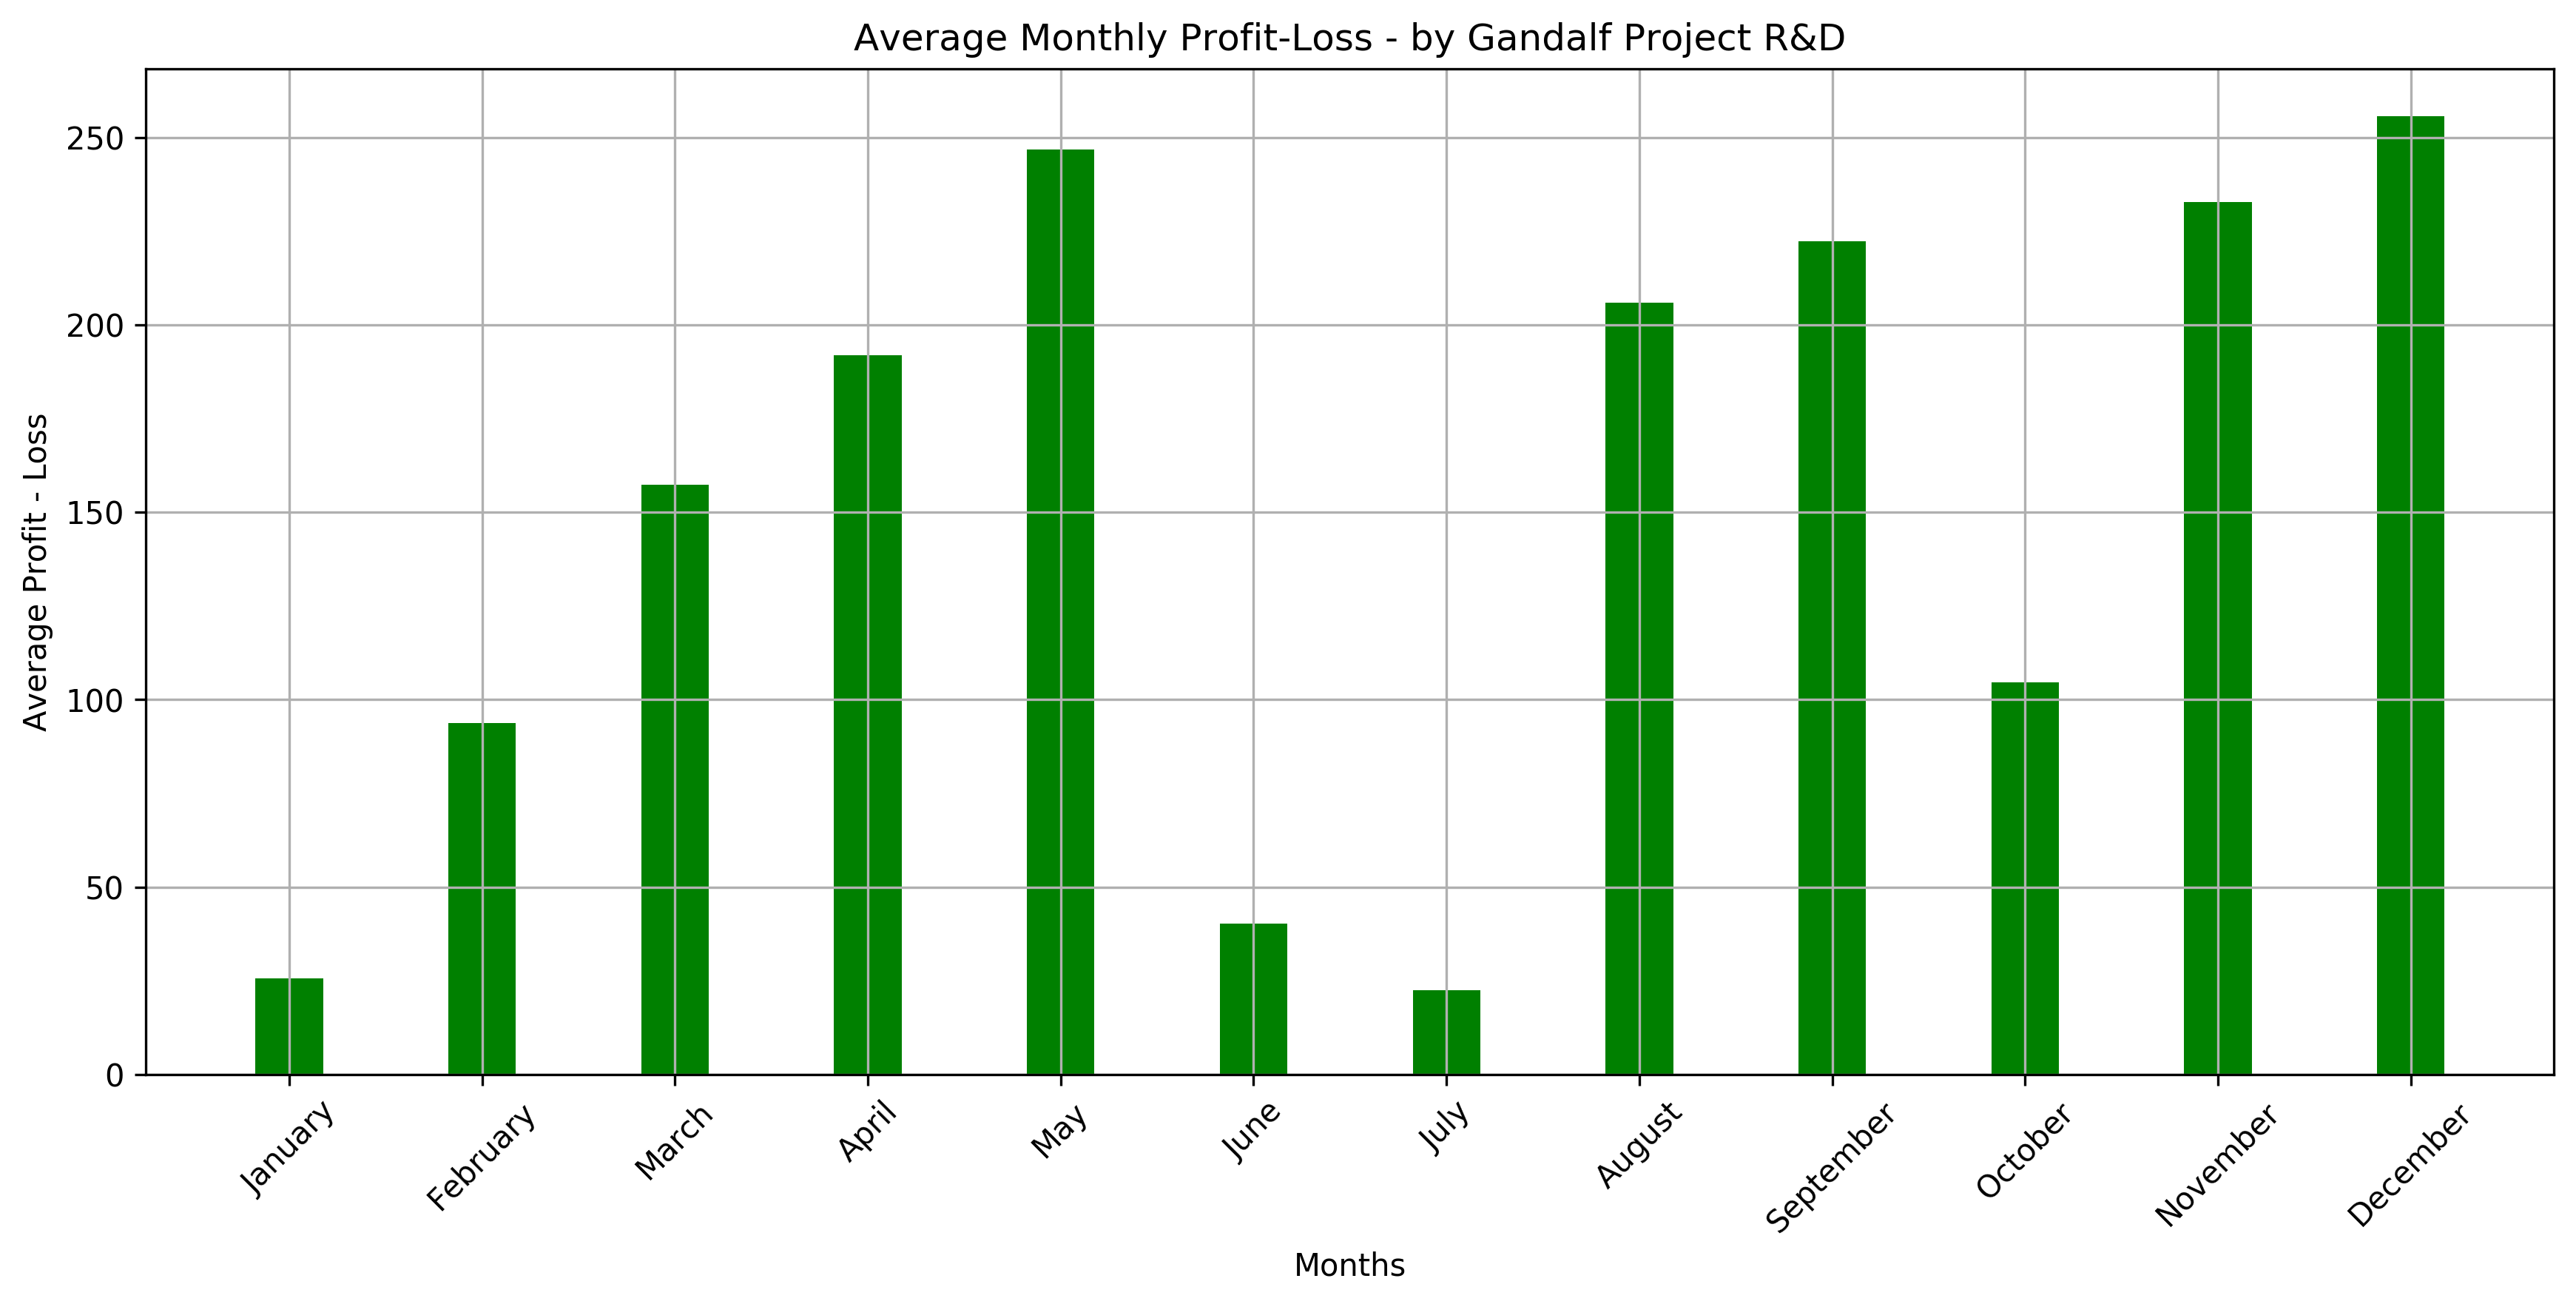

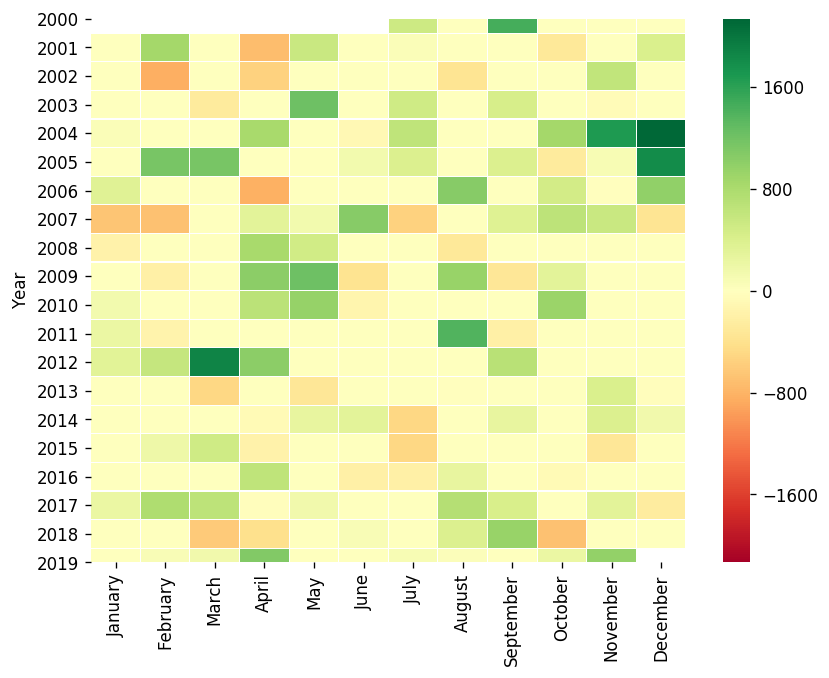

In [68]:
dataset["hhv20"] = dataset.high.rolling(20).max()
dataset["llv20"] = dataset.low.rolling(20).min()
dataset["hhv5"] = dataset.high.rolling(5).max()
dataset["llv5"] = dataset.low.rolling(5).min()
dataset.dropna(inplace=True)

COSTS = 0
INSTRUMENT = 1 # 1: equity/forex, 2: future
OPERATION_MONEY = 10000
DIRECTION = "long"
ORDER_TYPE = "market"
enter_level = dataset.open

enter_rules = crossover(dataset.close,dataset.hhv20.shift(1))

exit_rules = crossunder(dataset.close,dataset.llv5.shift(1)) | (dataset.day < dataset.day.shift(1))

trading_system = apply_trading_system(dataset, DIRECTION, ORDER_TYPE, enter_level, enter_rules, exit_rules)

operations = trading_system.operations.dropna()

performance_report(trading_system,operations,trading_system.closed_equity,trading_system.open_equity);